# Investment Portfolio Analysis

## Connect to SQL


In [63]:
# Import necessary libraries
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the connection string without username and password
server = 'IMPRINT'  # Replace with your server name
database = 'Project 1' 
connection_string = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'

# Function to connect to SQL Server
def connect_to_sql(connection_string):
    try:
        conn = pyodbc.connect(connection_string)
        print("Connection to SQL Server successful.")
        return conn
    except pyodbc.Error as e:
        print("Error connecting to SQL Server:", e)
        return None

# Connect to the SQL Server
conn = connect_to_sql(connection_string)

# Check if connection was successful before proceeding
if conn:
    try:
        query = "SELECT TOP 5 * FROM vwPortfolioReturns"
        df = pd.read_sql(query, conn)
        print("Data fetched successfully from vwPortfolioReturns:")
        print(df.head())
    except Exception as e:
        print(f"Error fetching data: {e}")
else:
    print("Connection to SQL Server failed. Please check the connection string and server accessibility.")


Connection to SQL Server successful.
Data fetched successfully from vwPortfolioReturns:
         Date  AssetID AssetType Ticker MarketIndex  AllocationAmount  \
0  2023-01-03        1     Stock   AAPL         NDX           12500.0   
1  2023-01-04        1     Stock   AAPL         NDX           12500.0   
2  2023-01-05        1     Stock   AAPL         NDX           12500.0   
3  2023-01-06        1     Stock   AAPL         NDX           12500.0   
4  2023-01-09        1     Stock   AAPL         NDX           12500.0   

   PreviousClosePrice  ClosePrice    Return  WeightedReturn  
0                 NaN      125.07       NaN             NaN  
1              125.07      126.36  0.010314      128.927800  
2              126.36      125.02 -0.010605     -132.557771  
3              125.02      129.62  0.036794      459.926412  
4              129.62      130.15  0.004089       51.110940  


C:\Users\Imprint\AppData\Local\Temp\ipykernel_1460\4221315983.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


# 1. Portfolio Metrics

This section covers the visualizations for the portfolio metrics.


## 1.1 Total Return

The total return for each asset in the portfolio.


Total return data fetched successfully.
Calculated total returns:
   Ticker  TotalReturn
0    AAPL     0.828416
1  EURUSD     0.001964
2     JNJ    -0.174757
3     JPM     0.536634
4    MSFT     0.918107
5     SPY     0.459535
6  USDJPY     0.232955
7     VTI     0.430702


C:\Users\Imprint\AppData\Local\Temp\ipykernel_1460\692083090.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_total_return = pd.read_sql(query, conn)


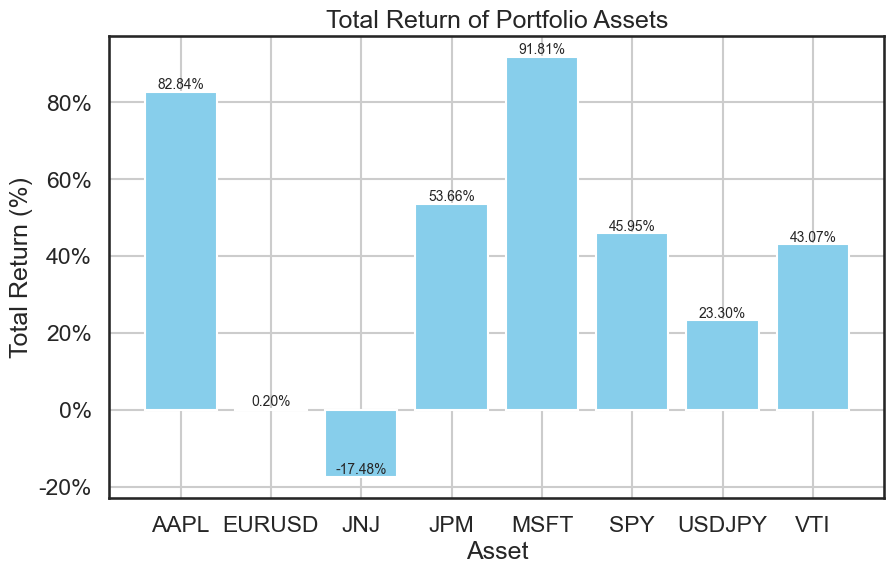

In [116]:
# Function to calculate total return
def calculate_total_return(df):
    df['TotalReturn'] = (df['ClosePrice'] / df.groupby('Ticker')['ClosePrice'].transform('first')) - 1
    total_returns = df.groupby('Ticker')['TotalReturn'].last().reset_index()
    return total_returns

# Fetch data
if conn:
    try:
        query = "SELECT * FROM vwPortfolioReturns"
        df_total_return = pd.read_sql(query, conn)
        print("Total return data fetched successfully.")
        
        # Convert Date to datetime
        df_total_return['Date'] = pd.to_datetime(df_total_return['Date'])
        
        # Calculate total return
        total_returns = calculate_total_return(df_total_return)
        print("Calculated total returns:")
        print(total_returns)
        
        # Plot total returns as a bar chart
        plt.figure(figsize=(10, 6))
        bars = plt.bar(total_returns['Ticker'], total_returns['TotalReturn'], color='skyblue')
        
        # Add value labels on top of the bars
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, height, '{:.2%}'.format(height),
                     ha='center', va='bottom', fontsize=10)
        
        plt.title('Total Return of Portfolio Assets')
        plt.xlabel('Asset')
        plt.ylabel('Total Return (%)')
        
        # Format y-axis as percentage
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
        
        plt.grid(True)
        plt.show()
        
    except Exception as e:
        print(f"Error fetching or processing total return data: {e}")
else:
    print("Connection to SQL Server failed. Cannot fetch total return data.")


## 1.2 Cumulative Return of Portfolio

The cumulative return represents the aggregate amount an investment has gained or lost over time, based on the initial investment. It helps in understanding the overall growth or decline of the portfolio.


Cumulative return data fetched successfully.


C:\Users\Imprint\AppData\Local\Temp\ipykernel_1460\1265466120.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cumulative_return = pd.read_sql(query, conn)


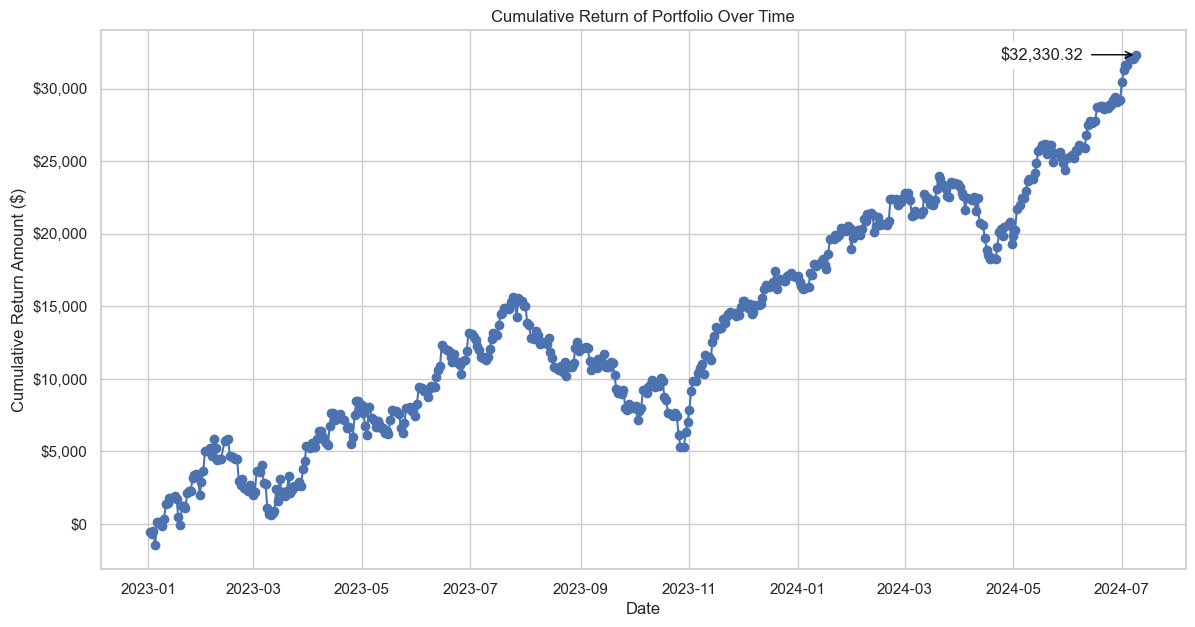

In [22]:
# Fetch data for cumulative return
if conn:
    try:
        query = "SELECT * FROM vwCumulativeReturns"
        df_cumulative_return = pd.read_sql(query, conn)
        print("Cumulative return data fetched successfully.")
        
        # Convert Date to datetime
        df_cumulative_return['Date'] = pd.to_datetime(df_cumulative_return['Date'])
        
        # Assuming the initial investment is $100,000
        initial_investment = 100000
        df_cumulative_return['CumulativeReturnAmount'] = df_cumulative_return['CumulativeReturn'] * initial_investment
        
        # Plot cumulative return as a line chart
        plt.figure(figsize=(14, 7))
        plt.plot(df_cumulative_return['Date'], df_cumulative_return['CumulativeReturnAmount'], marker='o', linestyle='-', color='b')
        
        plt.title('Cumulative Return of Portfolio Over Time')
        plt.xlabel('Date')
        plt.ylabel('Cumulative Return Amount ($)')
        
        # Format y-axis as currency
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '${:,.0f}'.format(x)))
        
        # Annotate the ending value
        last_date = df_cumulative_return['Date'].iloc[-1]
        last_value = df_cumulative_return['CumulativeReturnAmount'].iloc[-1]
        plt.annotate(f'${last_value:,.2f}', xy=(last_date, last_value), xytext=(last_date - pd.Timedelta(days=30), last_value),
                     arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='->'),
                     ha='right', va='center', fontsize=12, backgroundcolor='white')
        
        plt.grid(True)
        plt.show()
        
    except Exception as e:
        print(f"Error fetching or processing cumulative return data: {e}")
else:
    print("Connection to SQL Server failed. Cannot fetch cumulative return data.")


## 1.3 Annualized Return of Portfolio

The annualized return gives a geometric average amount of money earned by an investment each year over a given time period. It is a useful metric to compare the performance of different investments.



The dramatic changes in the annualized return early on are due to the nature of annualized return calculation. Here are some reasons for this behavior:
1. Short Time Frame: In the initial days, the time frame is very short, leading to higher volatility in the returns calculation.
2. Compounding Effect: Annualized returns involve compounding over a short period, which can exaggerate changes in the early days.
3. Data Points: The fewer data points available early on can lead to more significant swings in the calculated annualized return.
4. Market Movements: Initial sharp market movements can heavily influence the annualized return due to the small denominator effect in the early stages.

C:\Users\Imprint\AppData\Local\Temp\ipykernel_1460\665105579.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_annualized_return = pd.read_sql(query, conn)


Annualized return data fetched successfully.


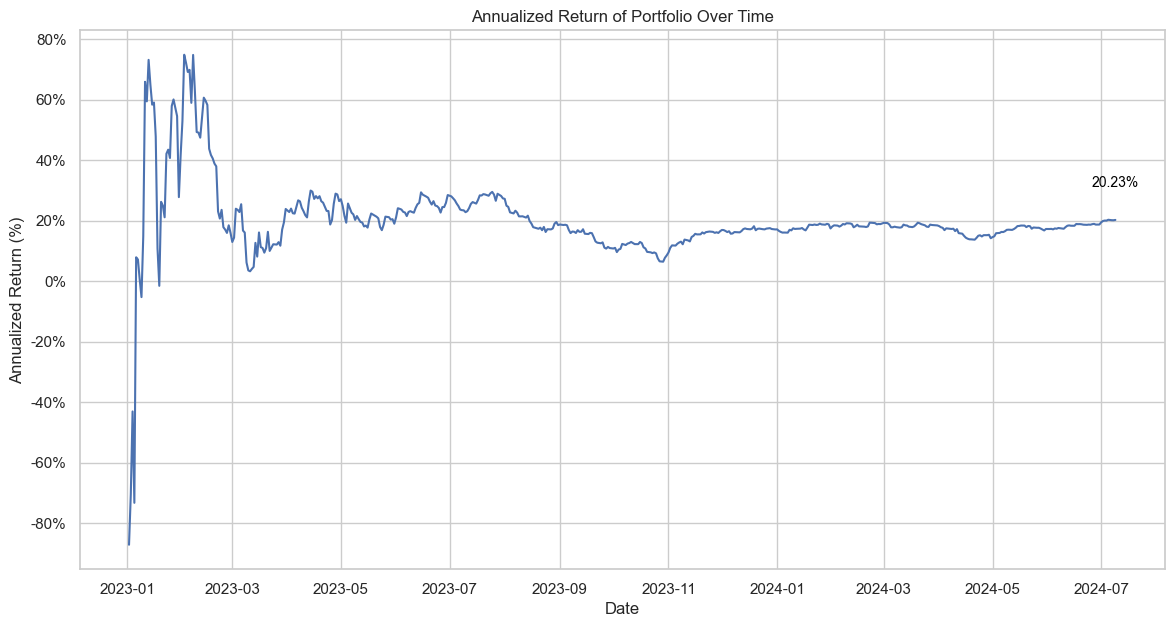

In [32]:
# Fetch data for annualized return
if conn:
    try:
        query = "SELECT * FROM vwAnnualizedReturns"
        df_annualized_return = pd.read_sql(query, conn)
        print("Annualized return data fetched successfully.")
        
        # Convert Date to datetime
        df_annualized_return['Date'] = pd.to_datetime(df_annualized_return['Date'])
        
        # Plot annualized return as a line chart
        plt.figure(figsize=(14, 7))
        sns.lineplot(x='Date', y='AnnualizedReturn', data=df_annualized_return, color='b')
        
        plt.title('Annualized Return of Portfolio Over Time')
        plt.xlabel('Date')
        plt.ylabel('Annualized Return (%)')
        
        # Format y-axis as percentage
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
        
        # Annotate the last data point value
        last_date = df_annualized_return['Date'].iloc[-1]
        last_value = df_annualized_return['AnnualizedReturn'].iloc[-1]
        plt.annotate(f'{last_value:.2%}', xy=(last_date, last_value), xytext=(last_date, last_value + 0.1),
                     arrowprops=dict(facecolor='black', arrowstyle='->'),
                     ha='center', va='bottom', fontsize=10, color='black')
        
        plt.grid(True)
        plt.show()
        
    except Exception as e:
        print(f"Error fetching or processing annualized return data: {e}")
else:
    print("Connection to SQL Server failed. Cannot fetch annualized return data.")


## 1.4 Volatility of Portfolio

Volatility represents the degree of variation of trading prices over time. It is a key metric to measure the risk associated with the portfolio. Higher volatility indicates higher risk and vice versa.


C:\Users\Imprint\AppData\Local\Temp\ipykernel_1460\3632746198.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_portfolio_volatility = pd.read_sql(query, conn)


Portfolio volatility data fetched successfully.


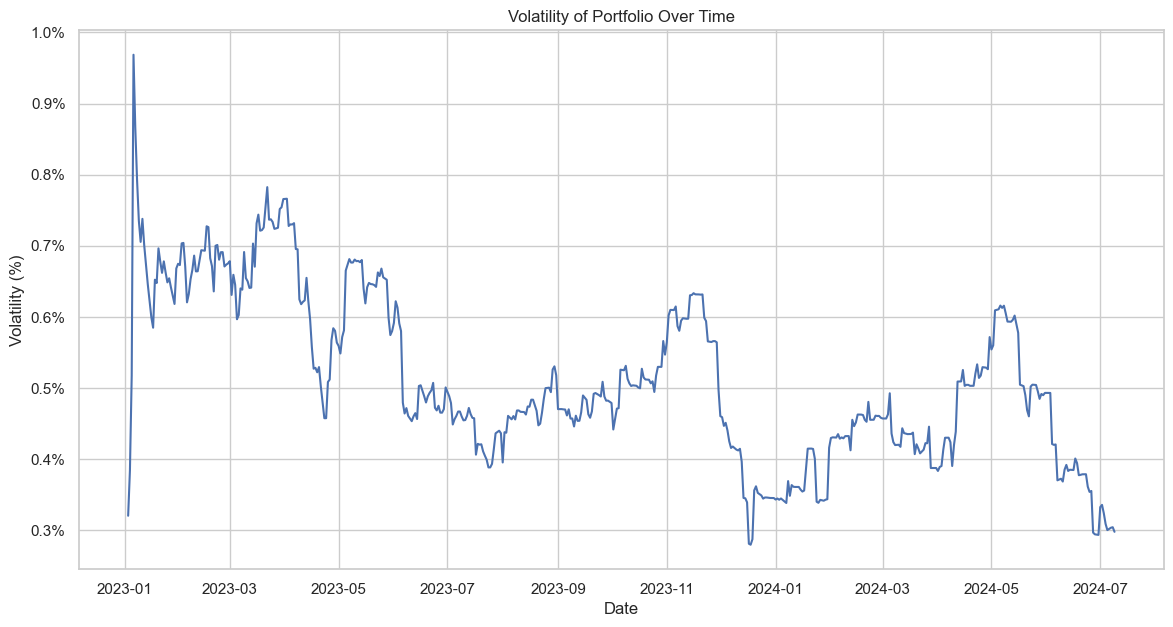

In [51]:
# Fetch data for portfolio volatility
if conn:
    try:
        query = "SELECT * FROM vwPortfolioVolatility"
        df_portfolio_volatility = pd.read_sql(query, conn)
        print("Portfolio volatility data fetched successfully.")
        
        # Convert Date to datetime
        df_portfolio_volatility['Date'] = pd.to_datetime(df_portfolio_volatility['Date'])
        
        # Plot portfolio volatility as a line chart
        plt.figure(figsize=(14, 7))
        sns.lineplot(x='Date', y='PortfolioVolatility', data=df_portfolio_volatility, color='b')
        
        plt.title('Volatility of Portfolio Over Time')
        plt.xlabel('Date')
        plt.ylabel('Volatility (%)')
        
        # Format y-axis as percentage with fewer significant digits
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
        
        plt.grid(True)
        plt.show()
        
    except Exception as e:
        print(f"Error fetching or processing portfolio volatility data: {e}")
else:
    print("Connection to SQL Server failed. Cannot fetch portfolio volatility data.")


## 1.5 Sharpe Ratio of Portfolio

The Sharpe Ratio measures the performance of an investment compared to a risk-free asset, after adjusting for its risk. The higher the Sharpe Ratio, the better the risk-adjusted performance of the portfolio.


1. Negative Sharpe Ratio: A negative Sharpe Ratio indicates that the portfolio is underperforming relative to a risk-free asset. This means that the returns of the portfolio are not compensating for the level of risk taken. In other words, the portfolio is earning less than what would be expected from a risk-free investment.

2. Magnitude: The value -6.52 is quite low and significantly negative, indicating very poor risk-adjusted performance. This suggests that the portfolio has not only failed to generate positive returns above the risk-free rate, but it has also experienced substantial volatility.

3. Risk and Return:

- Return: The average return of the portfolio is lower than the risk-free rate by a significant margin.
- Volatility: The portfolio has high volatility, amplifying the negative impact of low or negative returns.

4. Portfolio Evaluation:

- Underperformance: The portfolio is not generating sufficient returns to justify the risk being taken.
- Risk Management: There may be a need to re-evaluate the asset allocation and risk management strategies within the portfolio to improve performance.

Analytical Insights:
- Strategy Adjustment: A consistently negative Sharpe Ratio over time, especially one as low as -6.52, may prompt a need to adjust the investment strategy to either reduce risk or to identify more promising investments that could provide better returns.
- Performance Review: It is essential to review the performance of individual assets within the portfolio to identify the sources of poor performance and high volatility.

Sharpe Ratio data fetched successfully.


C:\Users\Imprint\AppData\Local\Temp\ipykernel_1460\2393953861.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sharpe_ratio = pd.read_sql(query, conn)


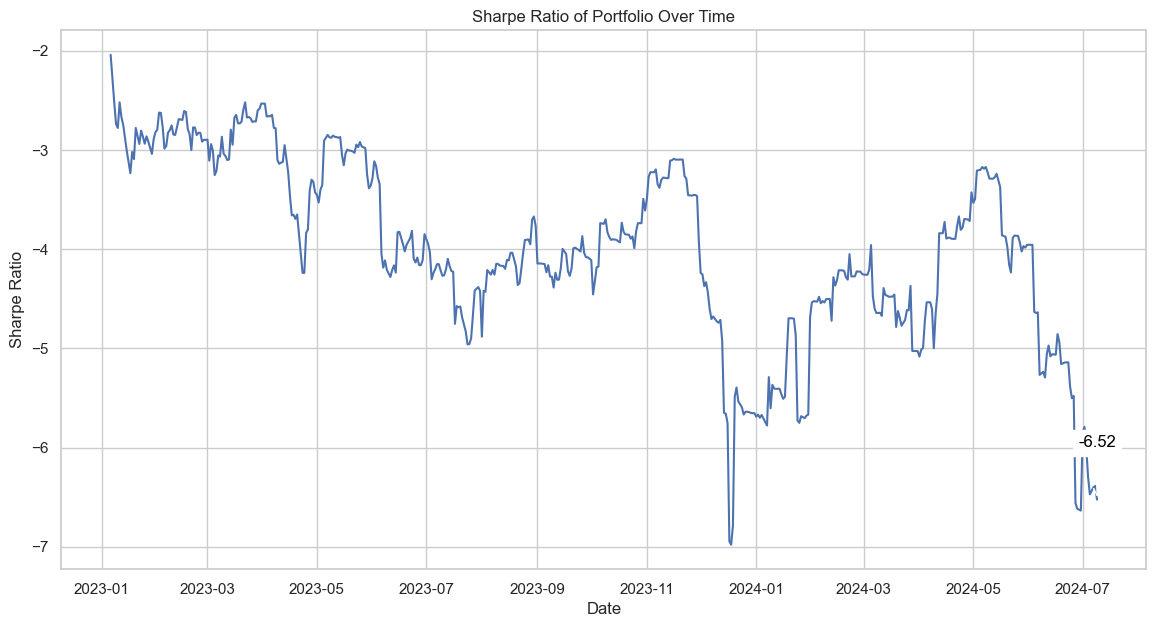

In [53]:
# Fetch data for Sharpe Ratio
if conn:
    try:
        query = "SELECT * FROM vwSharpeRatio"
        df_sharpe_ratio = pd.read_sql(query, conn)
        print("Sharpe Ratio data fetched successfully.")
        
        # Convert Date to datetime
        df_sharpe_ratio['Date'] = pd.to_datetime(df_sharpe_ratio['Date'])
        
        # Remove the first five data points
        df_sharpe_ratio = df_sharpe_ratio.iloc[5:]

        # Plot Sharpe Ratio as a line chart
        plt.figure(figsize=(14, 7))
        sns.lineplot(x='Date', y='SharpeRatio', data=df_sharpe_ratio, color='b')
        
        # Annotate the last data point
        last_date = df_sharpe_ratio['Date'].iloc[-1]
        last_value = df_sharpe_ratio['SharpeRatio'].iloc[-1]
        plt.annotate(f'{last_value:.2f}', xy=(last_date, last_value), xytext=(last_date, last_value + 0.5),
                     arrowprops=dict(facecolor='black', arrowstyle='->'),
                     ha='center', va='bottom', fontsize=12, color='black', backgroundcolor='white')
        
        plt.title('Sharpe Ratio of Portfolio Over Time')
        plt.xlabel('Date')
        plt.ylabel('Sharpe Ratio')
        
        plt.grid(True)
        plt.show()
        
    except Exception as e:
        print(f"Error fetching or processing Sharpe Ratio data: {e}")


## 2.1 Total Return of Stocks and ETFs

The total return represents the percentage change in the price of an asset over a specific period. It provides a clear picture of the performance of each stock and ETF in the portfolio.



Conclusion:
- Bar Chart: Provides a clear comparison of the average performance of each stock and ETF. It is useful for quickly identifying which assets have the highest and lowest average returns.
- Box Plot: Offers a detailed view of the distribution of returns, including median, quartiles, and outliers. It is useful for understanding the volatility and spread of returns.

Recommendation:
- Use the bar chart for presenting a clear and straightforward comparison of average total returns.
- Use the box plot to supplement the bar chart, providing additional insights into the variability and risk associated with each asset.

Total return data for stocks and ETFs fetched successfully.


C:\Users\Imprint\AppData\Local\Temp\ipykernel_1460\3825364978.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_total_return = pd.read_sql(query, conn)
C:\Users\Imprint\AppData\Local\Temp\ipykernel_1460\3825364978.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Ticker", y="TotalReturn", data=df_total_return, palette="pastel")


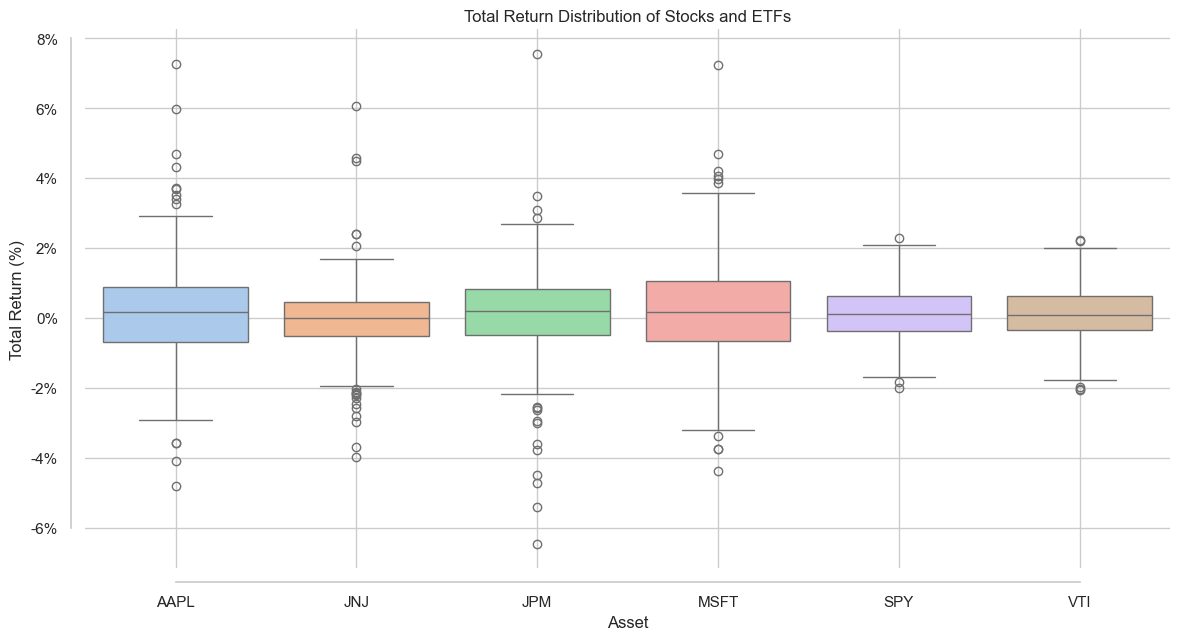

In [56]:
# Fetch data for total return of stocks and ETFs
if conn:
    try:
        query = "SELECT * FROM vwStockETFTotalReturn"
        df_total_return = pd.read_sql(query, conn)
        print("Total return data for stocks and ETFs fetched successfully.")
        
        # Convert Date to datetime
        df_total_return['Date'] = pd.to_datetime(df_total_return['Date'])
        
        # Draw a nested boxplot to show total returns by asset
        plt.figure(figsize=(14, 7))
        sns.boxplot(x="Ticker", y="TotalReturn", data=df_total_return, palette="pastel")
        sns.despine(offset=10, trim=True)
        
        plt.title('Total Return Distribution of Stocks and ETFs')
        plt.xlabel('Asset')
        plt.ylabel('Total Return (%)')
        
        # Format y-axis as percentage
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
        
        plt.grid(True)
        plt.show()
        
    except Exception as e:
        print(f"Error fetching or processing total return data: {e}")
else:
    print("Connection to SQL Server failed. Cannot fetch total return data.")

Total return data fetched successfully.


C:\Users\Imprint\AppData\Local\Temp\ipykernel_1460\3183372202.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_total_return = pd.read_sql(query, conn)
C:\Users\Imprint\AppData\Local\Temp\ipykernel_1460\3183372202.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Ticker', y='AvgTotalReturn', data=df_total_return, palette='deep')


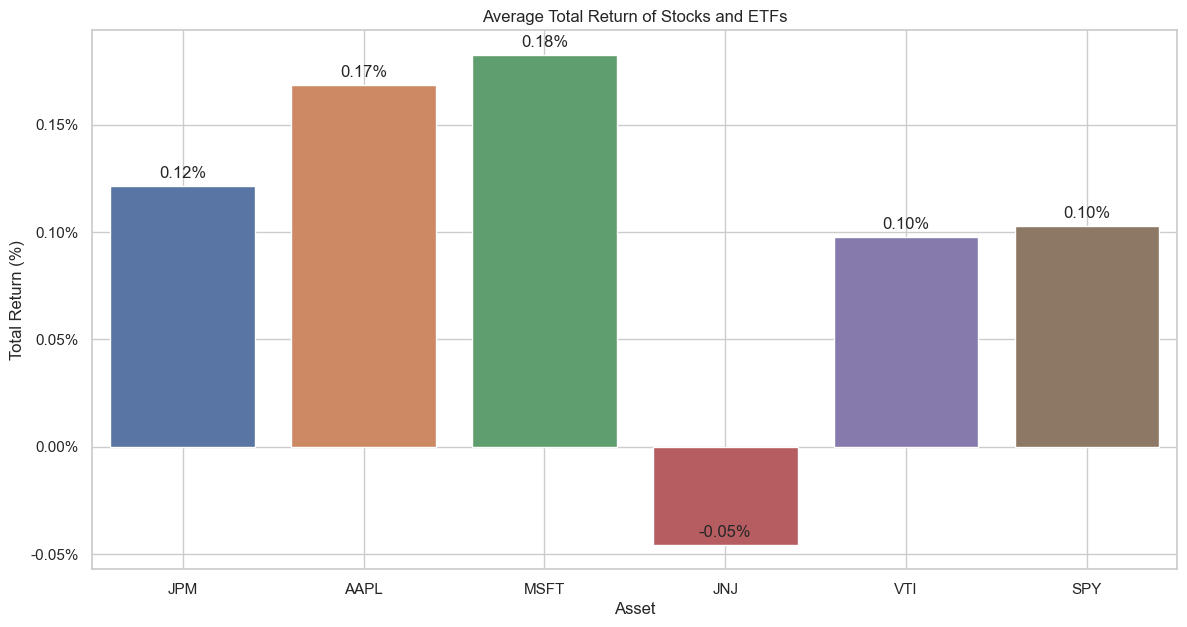

In [60]:
# Fetch data for total return of stocks and ETFs
if conn:
    try:
        query = "SELECT Ticker, AVG(TotalReturn) as AvgTotalReturn FROM vwStockETFTotalReturn GROUP BY Ticker"
        df_total_return = pd.read_sql(query, conn)
        print("Total return data fetched successfully.")
        
        # Plot total returns as a bar chart
        plt.figure(figsize=(14, 7))
        ax = sns.barplot(x='Ticker', y='AvgTotalReturn', data=df_total_return, palette='deep')

        plt.title('Average Total Return of Stocks and ETFs')
        plt.xlabel('Asset')
        plt.ylabel('Total Return (%)')
        
        # Format y-axis with percentage
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.2%}'.format(y)))
        
        # Add value labels on top of the bars
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2%}', 
                        (p.get_x() + p.get_width() / 2., height),
                        ha = 'center', va = 'center', 
                        xytext = (0, 9), 
                        textcoords = 'offset points')

        plt.grid(True)
        plt.show()
        
    except Exception as e:
        print(f"Error fetching or processing total return data: {e}")
else:
    print("Connection to SQL Server failed. Cannot fetch total return data.")

## 2.2 Cumulative Return of Stocks and ETFs

The cumulative return represents the total change in value of an investment over a given period of time. It helps to understand the overall growth or decline of each asset in the portfolio.


C:\Users\Imprint\AppData\Local\Temp\ipykernel_1460\3989010193.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cumulative_return = pd.read_sql(query, conn)


Cumulative return data fetched successfully.


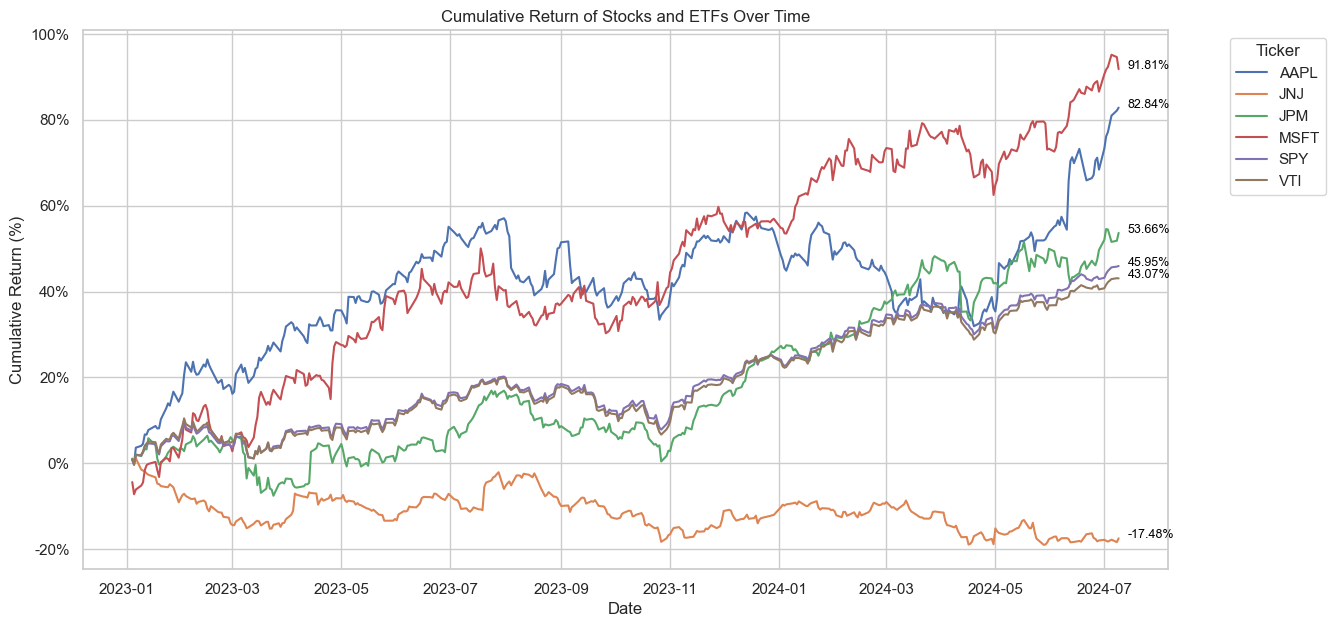

In [66]:
# Fetch data for cumulative return of stocks and ETFs
if conn:
    try:
        query = "SELECT * FROM vwStockETFCumulativeReturn"
        df_cumulative_return = pd.read_sql(query, conn)
        print("Cumulative return data fetched successfully.")
        
        # Convert Date to datetime
        df_cumulative_return['Date'] = pd.to_datetime(df_cumulative_return['Date'])
        
        # Plot cumulative return as a line chart for each stock and ETF
        plt.figure(figsize=(14, 7))
        sns.lineplot(x='Date', y='CumulativeReturn', hue='Ticker', data=df_cumulative_return)
        
        plt.title('Cumulative Return of Stocks and ETFs Over Time')
        plt.xlabel('Date')
        plt.ylabel('Cumulative Return (%)')
        
        # Format y-axis as percentage
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
        
        # Annotate the final value for each ticker
        for ticker in df_cumulative_return['Ticker'].unique():
            ticker_data = df_cumulative_return[df_cumulative_return['Ticker'] == ticker]
            last_point = ticker_data.iloc[-1]
            plt.annotate(f"{last_point['CumulativeReturn']:.2%}", 
                         xy=(last_point['Date'], last_point['CumulativeReturn']),
                         xytext=(last_point['Date'] + pd.Timedelta(days=5), last_point['CumulativeReturn']),
                         ha='left', fontsize=9, color='black')
        
        plt.grid(True)
        plt.legend(title='Ticker', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()
        
    except Exception as e:
        print(f"Error fetching or processing cumulative return data: {e}")
else:
    print("Connection to SQL Server failed. Cannot fetch cumulative return data.")


## 2.3 Volatility of Stocks and ETFs

Volatility measures the degree of variation in the trading price of an asset over time. Higher volatility indicates higher risk due to larger price swings, while lower volatility indicates more stable price movements.

C:\Users\Imprint\AppData\Local\Temp\ipykernel_1460\889845624.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_volatility = pd.read_sql(query, conn)


Volatility data fetched successfully.


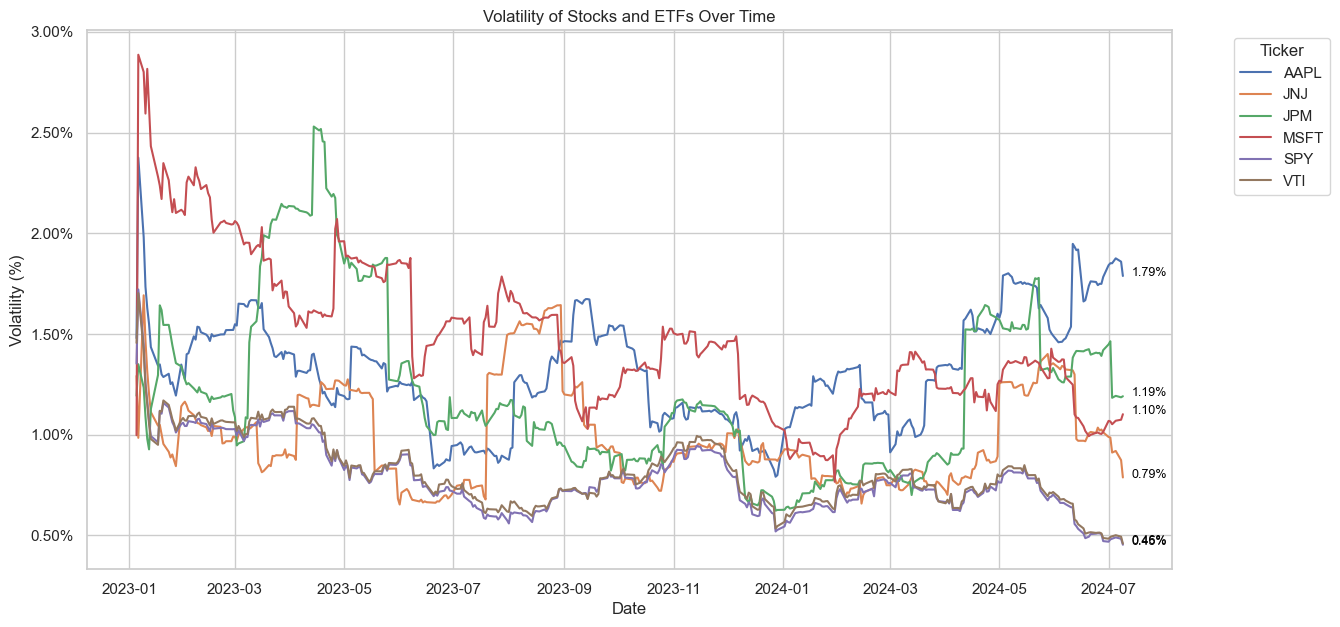

In [67]:
# Fetch data for volatility of stocks and ETFs
if conn:
    try:
        query = "SELECT * FROM vwStockETFVolatility"
        df_volatility = pd.read_sql(query, conn)
        print("Volatility data fetched successfully.")
        
        # Convert Date to datetime
        df_volatility['Date'] = pd.to_datetime(df_volatility['Date'])
        
        # Plot volatility as a line chart for each stock and ETF
        plt.figure(figsize=(14, 7))
        sns.lineplot(x='Date', y='Volatility', hue='Ticker', data=df_volatility)
        
        plt.title('Volatility of Stocks and ETFs Over Time')
        plt.xlabel('Date')
        plt.ylabel('Volatility (%)')
        
        # Format y-axis as percentage
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.2%}'.format(y)))
        
        # Annotate the final value for each ticker
        for ticker in df_volatility['Ticker'].unique():
            ticker_data = df_volatility[df_volatility['Ticker'] == ticker]
            last_point = ticker_data.iloc[-1]
            plt.annotate(f"{last_point['Volatility']:.2%}", 
                         xy=(last_point['Date'], last_point['Volatility']),
                         xytext=(last_point['Date'] + pd.Timedelta(days=5), last_point['Volatility']),
                         ha='left', fontsize=9, color='black')
        
        plt.grid(True)
        plt.legend(title='Ticker', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()
        
    except Exception as e:
        print(f"Error fetching or processing volatility data: {e}")
else:
    print("Connection to SQL Server failed. Cannot fetch volatility data.")


C:\Users\Imprint\AppData\Local\Temp\ipykernel_1460\1152306378.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_volatility = pd.read_sql(query, conn)


Volatility data fetched successfully.


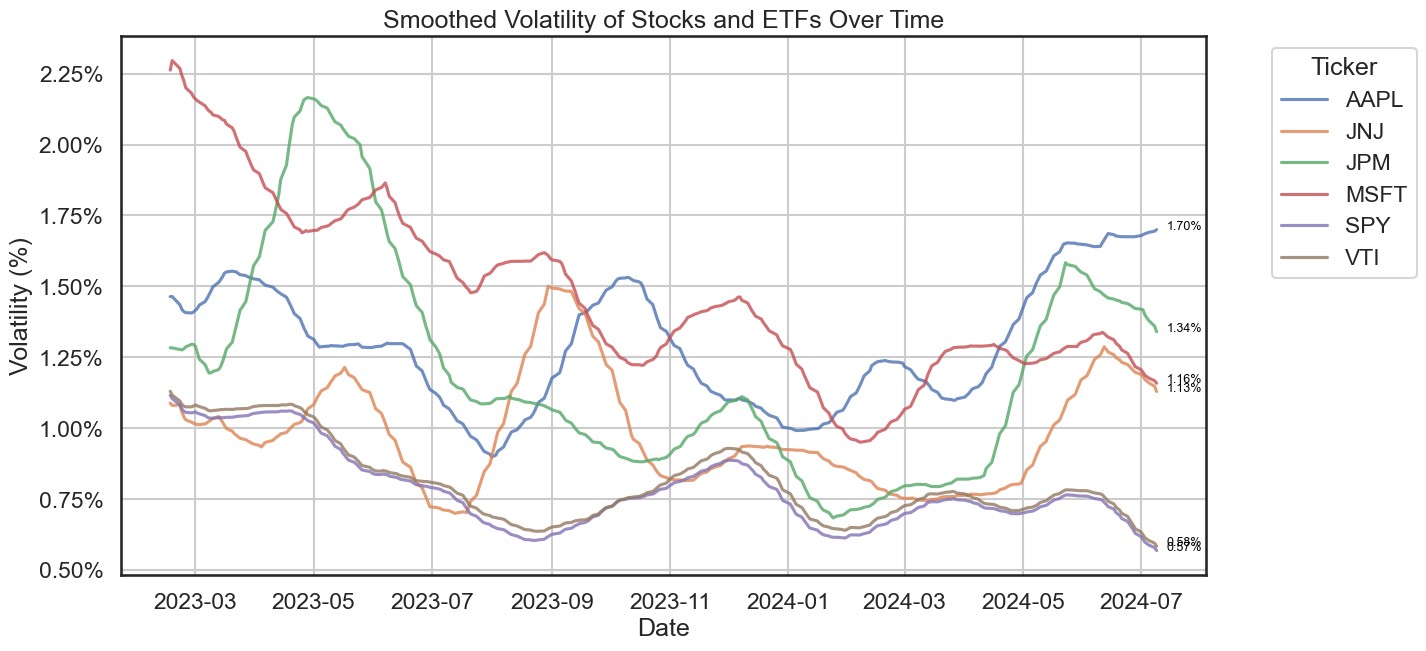

In [69]:
# Fetch data for volatility of stocks and ETFs
if conn:
    try:
        query = "SELECT * FROM vwStockETFVolatility"
        df_volatility = pd.read_sql(query, conn)
        print("Volatility data fetched successfully.")
        
        # Convert Date to datetime
        df_volatility['Date'] = pd.to_datetime(df_volatility['Date'])
        
        # Apply moving average to smooth the lines
        df_volatility['SmoothedVolatility'] = df_volatility.groupby('Ticker')['Volatility'].transform(lambda x: x.rolling(window=30).mean())
        
        # Plot smoothed volatility as a line chart for each stock and ETF
        plt.figure(figsize=(14, 7))
        sns.lineplot(x='Date', y='SmoothedVolatility', hue='Ticker', data=df_volatility, alpha=0.8)
        
        plt.title('Smoothed Volatility of Stocks and ETFs Over Time')
        plt.xlabel('Date')
        plt.ylabel('Volatility (%)')
        
        # Format y-axis as percentage
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.2%}'.format(y)))
        
        # Annotate the final value for each ticker
        for ticker in df_volatility['Ticker'].unique():
            ticker_data = df_volatility[df_volatility['Ticker'] == ticker]
            last_point = ticker_data.dropna().iloc[-1]
            plt.annotate(f"{last_point['SmoothedVolatility']:.2%}", 
                         xy=(last_point['Date'], last_point['SmoothedVolatility']),
                         xytext=(last_point['Date'] + pd.Timedelta(days=5), last_point['SmoothedVolatility']),
                         ha='left', fontsize=9, color='black')
        
        plt.grid(True)
        plt.legend(title='Ticker', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()
        
    except Exception as e:
        print(f"Error fetching or processing volatility data: {e}")
else:
    print("Connection to SQL Server failed. Cannot fetch volatility data.")


C:\Users\Imprint\AppData\Local\Temp\ipykernel_1460\2392905108.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_volatility = pd.read_sql(query, conn)


Volatility data fetched successfully.


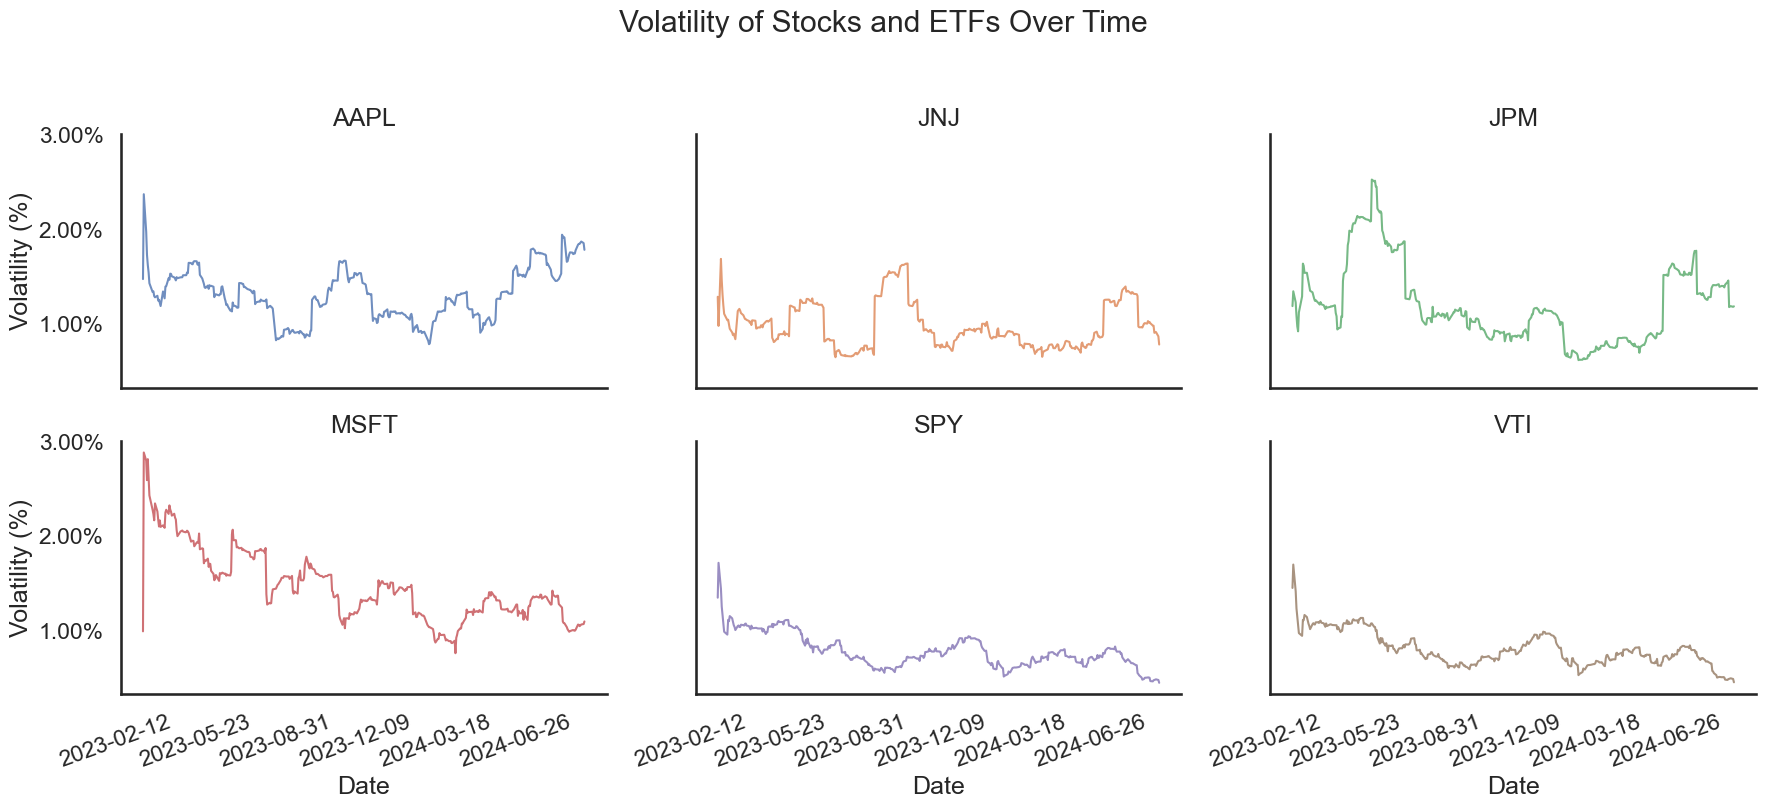

In [77]:
# Define a color palette matching the legend provided
palette = {
    'AAPL': '#4c72b0',  # Blue
    'JNJ': '#dd8452',   # Orange
    'JPM': '#55a868',   # Green
    'MSFT': '#c44e52',  # Red
    'SPY': '#8172b3',   # Purple
    'VTI': '#937860'    # Brown
}

# Fetch data for volatility of stocks and ETFs
if conn:
    try:
        query = "SELECT * FROM vwStockETFVolatility"
        df_volatility = pd.read_sql(query, conn)
        print("Volatility data fetched successfully.")
        
        # Convert Date to datetime
        df_volatility['Date'] = pd.to_datetime(df_volatility['Date'])
        
        # Create a FacetGrid for each stock and ETF
        g = sns.FacetGrid(df_volatility, col='Ticker', col_wrap=3, height=4, aspect=1.5, palette=palette)
        g.map_dataframe(sns.lineplot, 'Date', 'Volatility', hue='Ticker', alpha=0.8, linewidth=1.5, palette=palette)
        
        # Add titles and format y-axis as percentage
        g.set_titles("{col_name}")
        g.set_axis_labels("Date", "Volatility (%)")
        
        # Rotate date labels and set date format
        for ax in g.axes.flatten():
            ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.2%}'.format(y)))
            ax.xaxis.set_major_locator(plt.MaxNLocator(7))  # Set a max of 6 date labels
            for label in ax.get_xticklabels():
                label.set_rotation(20)
                label.set_horizontalalignment('right')
        
        plt.suptitle('Volatility of Stocks and ETFs Over Time', y=1.02)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error fetching or processing volatility data: {e}")
else:
    print("Connection to SQL Server failed. Cannot fetch volatility data.")

## 2.4 10-Day and 100-Day Moving Averages

The moving averages provide insights into the price trends of the stocks and ETFs over different periods. The 10-day moving average is a short-term trend indicator, while the 100-day moving average gives a longer-term trend perspective.

### Visualization of 10-Day and 100-Day Moving Averages

The following plots show the 10-day and 100-day moving averages for each stock and ETF in the portfolio over time.


Trend Analysis:
- AAPL (Apple): Shows a strong upward trend, especially since mid-2023. Both the 10-day and 100-day moving averages indicate consistent growth with the 10-day MA frequently staying above the 100-day MA.
- JNJ (Johnson & Johnson): Displays a fluctuating trend with some periods of decline, particularly towards the end of the period. The 10-day MA crosses below the 100-day MA several times, indicating shorter-term bearish trends.
- JPM (JPMorgan Chase): Exhibits a consistent upward trend with the 10-day MA generally staying above the 100-day MA, signaling sustained growth.
- MSFT (Microsoft): Shows a strong upward trend similar to AAPL, with both moving averages indicating sustained growth.
- SPY (SPDR S&P 500 ETF Trust) and VTI (Vanguard Total Stock Market ETF): Both show consistent growth over time, with the 10-day MA staying above the 100-day MA, reflecting overall market trends.

Moving Average Crossovers:
- AAPL and MSFT: The 10-day MA remains consistently above the 100-day MA, suggesting strong momentum and potential for continued growth.
- JNJ: Several crossovers where the 10-day MA falls below the 100-day MA indicate periods of short-term declines or corrections.
- SPY and VTI: The ETFs show a stable upward trend, reflecting broader market performance with fewer crossovers compared to individual stocks like JNJ.

Volatility and Corrections:
- JNJ: The fluctuations and crossovers indicate higher volatility and more frequent corrections compared to other assets.
- AAPL, MSFT, SPY, and VTI: Show more stable trends with fewer crossovers, indicating lower volatility and sustained growth.

Investment Implications:
- AAPL, MSFT, SPY, and VTI: These assets appear to be more stable with consistent growth, making them potentially good candidates for long-term investments.
- JNJ: The higher volatility and frequent corrections may indicate higher risk, requiring closer monitoring and potentially a more active investment strategy.

C:\Users\Imprint\AppData\Local\Temp\ipykernel_1460\736369286.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_moving_averages = pd.read_sql(query, conn)
C:\Users\Imprint\AppData\Local\Temp\ipykernel_1460\736369286.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_moving_averages = df_moving_averages.groupby('Ticker').apply(lambda x: x.iloc[5:]).reset_index(drop=True)


Moving averages data fetched successfully.


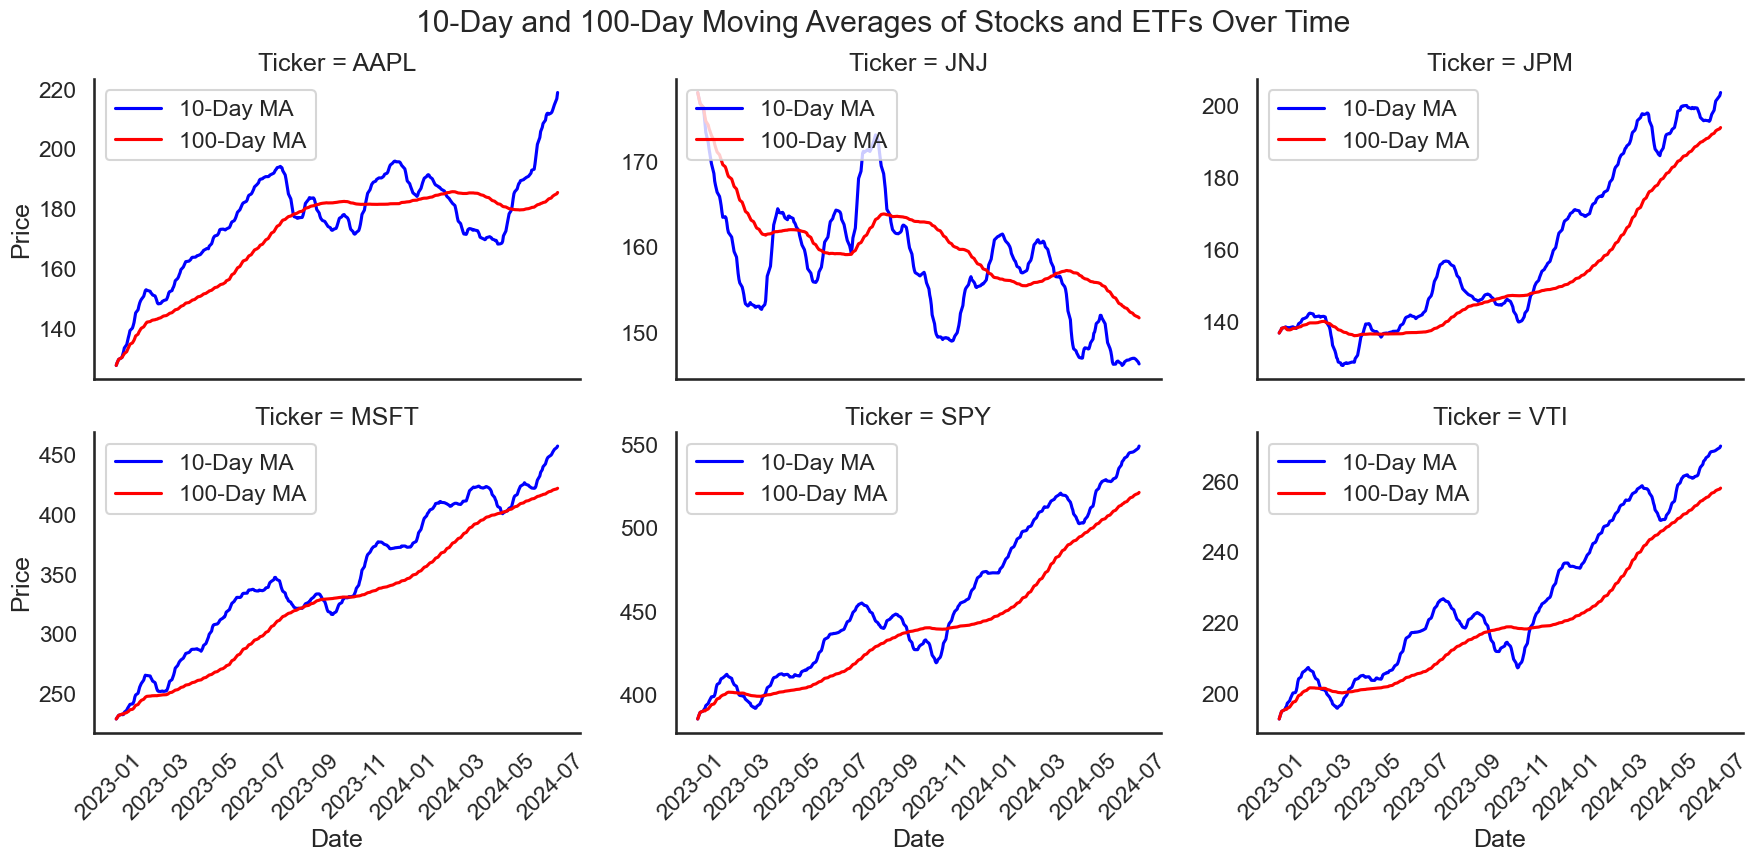

In [81]:
# Fetch data for 10-day and 100-day moving averages
if conn:
    try:
        query = "SELECT * FROM vwStockETFMovingAverages"
        df_moving_averages = pd.read_sql(query, conn)
        print("Moving averages data fetched successfully.")
        
        # Convert Date to datetime
        df_moving_averages['Date'] = pd.to_datetime(df_moving_averages['Date'])
        
        # Remove the first 5 data points
        df_moving_averages = df_moving_averages.groupby('Ticker').apply(lambda x: x.iloc[5:]).reset_index(drop=True)

        # Create the FacetGrid for 10-day and 100-day moving averages
        g = sns.FacetGrid(df_moving_averages, col="Ticker", col_wrap=3, sharey=False, height=4, aspect=1.5)
        g.map(sns.lineplot, "Date", "MovingAvg10Day", color='blue', label='10-Day MA')
        g.map(sns.lineplot, "Date", "MovingAvg100Day", color='red', label='100-Day MA')
        
        # Adjust the legend and titles
        for ax in g.axes.flatten():
            ax.legend(loc='upper left')
            for label in ax.get_xticklabels():
                label.set_rotation(45)
        
        g.fig.suptitle('10-Day and 100-Day Moving Averages of Stocks and ETFs Over Time', y=1.02)
        g.set_axis_labels("Date", "Price")
        plt.show()
        
    except Exception as e:
        print(f"Error fetching or processing moving averages data: {e}")
else:
    print("Connection to SQL Server failed. Cannot fetch moving averages data.")


## 2.5 Sharpe Ratio of Stocks and ETFs

The Sharpe ratio measures the performance of an asset by adjusting for its risk. It is calculated by subtracting the risk-free rate from the asset's return and then dividing by the asset's standard deviation. A higher Sharpe ratio indicates better risk-adjusted returns.

C:\Users\Imprint\AppData\Local\Temp\ipykernel_1460\2113855714.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sharpe_ratio = pd.read_sql(query, conn)
C:\Users\Imprint\AppData\Local\Temp\ipykernel_1460\2113855714.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sharpe_ratio = df_sharpe_ratio.groupby('Ticker').apply(lambda x: x.iloc[5:]).reset_index(drop=True)


Sharpe ratio data fetched successfully.


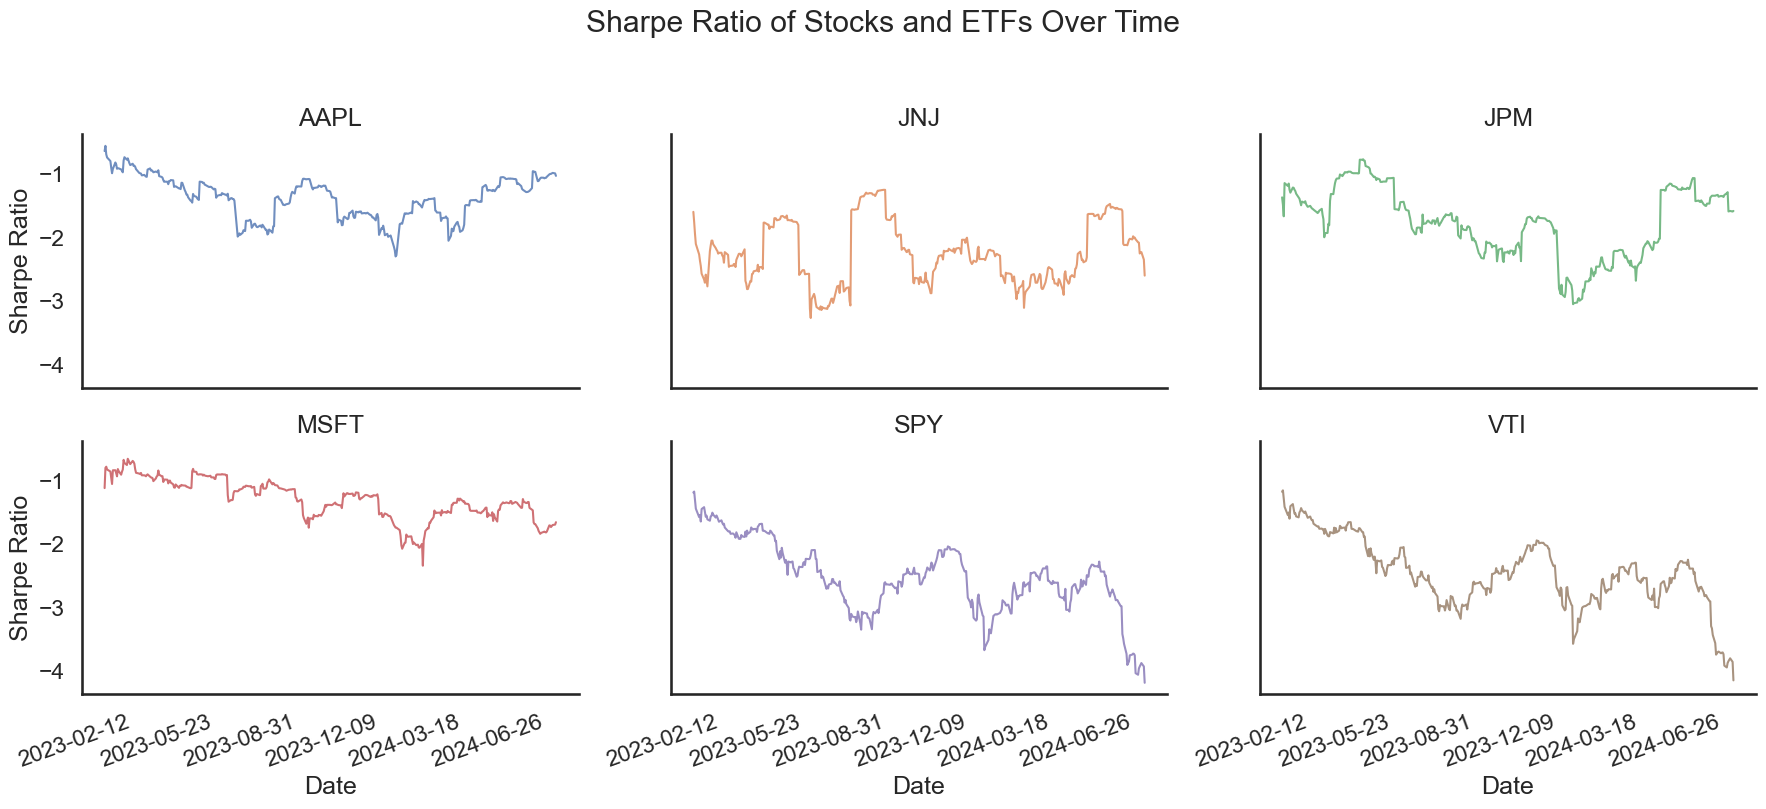

In [87]:
# Define a color palette matching the legend provided
palette = {
    'AAPL': '#4c72b0',  # Blue
    'JNJ': '#dd8452',   # Orange
    'JPM': '#55a868',   # Green
    'MSFT': '#c44e52',  # Red
    'SPY': '#8172b3',   # Purple
    'VTI': '#937860'    # Brown
}

# Fetch data for Sharpe ratio of stocks and ETFs
if conn:
    try:
        query = "SELECT * FROM vwStockETFSharpeRatio"
        df_sharpe_ratio = pd.read_sql(query, conn)
        print("Sharpe ratio data fetched successfully.")
        
        # Convert Date to datetime
        df_sharpe_ratio['Date'] = pd.to_datetime(df_sharpe_ratio['Date'])
        
        # Remove the first 5 data points for each ticker
        df_sharpe_ratio = df_sharpe_ratio.groupby('Ticker').apply(lambda x: x.iloc[5:]).reset_index(drop=True)
        
        # Create a FacetGrid for each stock and ETF
        g = sns.FacetGrid(df_sharpe_ratio, col='Ticker', col_wrap=3, height=4, aspect=1.5, palette=palette)
        g.map_dataframe(sns.lineplot, 'Date', 'SharpeRatio', hue='Ticker', alpha=0.8, linewidth=1.5, palette=palette)
        
        # Add titles and format y-axis
        g.set_titles("{col_name}")
        g.set_axis_labels("Date", "Sharpe Ratio")
        
        # Rotate date labels and set date format
        for ax in g.axes.flatten():
            ax.xaxis.set_major_locator(plt.MaxNLocator(7))  # Set a max of 7 date labels
            for label in ax.get_xticklabels():
                label.set_rotation(20)
                label.set_horizontalalignment('right')
        
        plt.suptitle('Sharpe Ratio of Stocks and ETFs Over Time', y=1.02)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error fetching or processing Sharpe ratio data: {e}")
else:
    print("Connection to SQL Server failed. Cannot fetch Sharpe ratio data.")


## 2.6 Beta of Stocks and ETFs

The Beta of a stock or ETF is a measure of its volatility in relation to the market. A Beta of 1 indicates that the asset's price moves with the market. A Beta greater than 1 indicates higher volatility than the market, while a Beta less than 1 indicates lower volatility. In this analysis, we calculate the Beta for each stock and ETF based on their covariance with the Nasdaq 100 and the variance of the Nasdaq 100.


The Beta of a stock measures its volatility in relation to the overall market (in this case, the Nasdaq 100 index). Here's the analysis based on the provided graphs:

1. AAPL (Apple Inc.):
The Beta for AAPL starts high at around 1.4 and gradually decreases to about 0.8.
This suggests that AAPL was more volatile compared to the market initially but became less volatile over time.

2. JNJ (Johnson & Johnson):
The Beta for JNJ starts at around 0.6 and decreases to near 0.
This indicates that JNJ was initially less volatile compared to the market and became even less so, showing very little correlation with the market movements.

3. JPM (JPMorgan Chase & Co.):
The Beta for JPM starts high and rapidly decreases to around 0.5 and further down to near 0.
JPM was initially more volatile but stabilized to show less volatility compared to the market.

4. MSFT (Microsoft Corporation):
The Beta for MSFT starts at around 0.5, rises to 1.0, and then stabilizes.
MSFT initially showed less volatility, but over time, its volatility matched that of the market.

5. SPY (SPDR S&P 500 ETF):
The Beta for SPY starts at around 0.5 and stabilizes at around 0.7.
This indicates that SPY is less volatile compared to the Nasdaq 100 index but has a stable correlation.

6. VTI (Vanguard Total Stock Market ETF):
The Beta for VTI starts low at around 0.2, quickly rises to around 0.8, and stabilizes.
VTI's volatility increased to align more closely with the market over time but still shows less volatility compared to the market.

Key Insights
- Volatility Trends: Most stocks and ETFs showed high initial volatility, which stabilized over time.
- Market Correlation:
    - AAPL and MSFT showed significant correlation with the market (Beta closer to 1), indicating their returns move closely with the market returns.
    - JNJ showed very low market correlation over time, indicating it is less affected by market movements.
    -  SPY and VTI showed moderate correlation with the market, indicating they are influenced by market movements but with less volatility.
- Risk Assessment:
    - Higher Beta values (closer to or above 1) suggest higher risk and higher potential returns. Stocks like AAPL and MSFT are examples.
    - Lower Beta values suggest lower risk and more stable returns. JNJ and VTI exemplify this stability.

C:\Users\Imprint\AppData\Local\Temp\ipykernel_1460\866056341.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_beta = pd.read_sql(query, conn)
C:\Users\Imprint\AppData\Local\Temp\ipykernel_1460\866056341.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_beta = df_beta.groupby('Ticker').apply(lambda group: group.iloc[5:]).reset_index(drop=True)


Beta data fetched successfully.


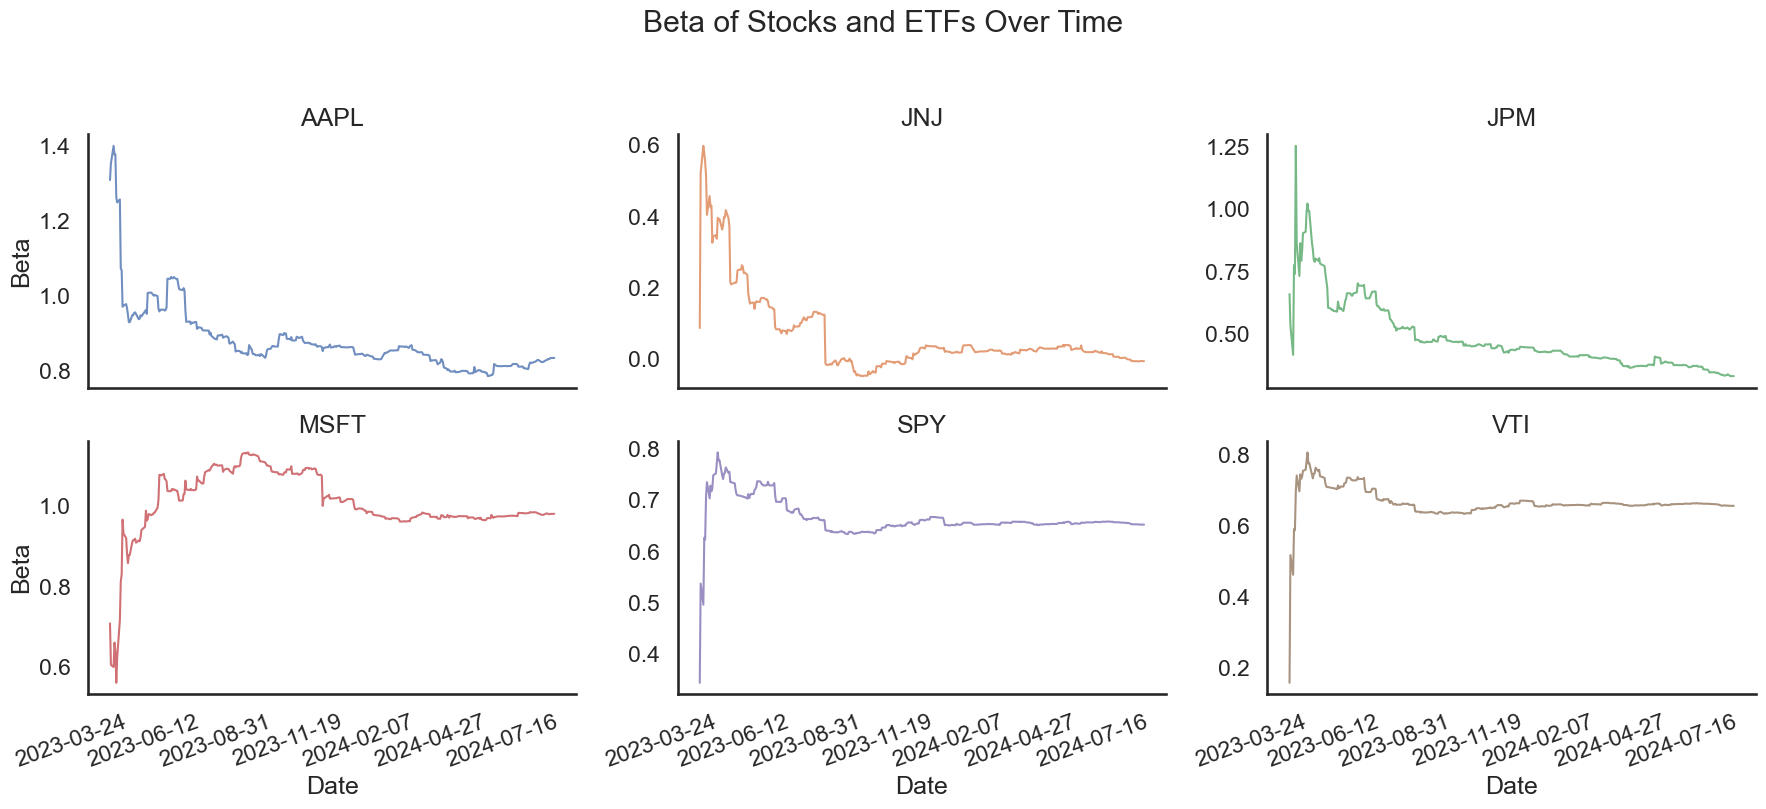

In [94]:
# Define a color palette matching the legend provided
palette = {
    'AAPL': '#4c72b0',  # Blue
    'JNJ': '#dd8452',   # Orange
    'JPM': '#55a868',   # Green
    'MSFT': '#c44e52',  # Red
    'SPY': '#8172b3',   # Purple
    'VTI': '#937860'    # Brown
}

# Fetch data for Beta of stocks and ETFs
if conn:
    try:
        query = "SELECT * FROM vwStockETFBeta"
        df_beta = pd.read_sql(query, conn)
        print("Beta data fetched successfully.")
        
        # Convert Date to datetime
        df_beta['Date'] = pd.to_datetime(df_beta['Date'])
        
        # Remove the first 5 data values
        df_beta = df_beta.groupby('Ticker').apply(lambda group: group.iloc[5:]).reset_index(drop=True)
        
        # Create a FacetGrid for each stock and ETF
        g = sns.FacetGrid(df_beta, col='Ticker', col_wrap=3, height=4, aspect=1.5, palette=palette, sharey=False)
        g.map_dataframe(sns.lineplot, 'Date', 'Beta', hue='Ticker', alpha=0.8, linewidth=1.5, palette=palette)
        
        # Add titles and format y-axis
        g.set_titles("{col_name}")
        g.set_axis_labels("Date", "Beta")
        
        # Rotate date labels and set date format
        for ax in g.axes.flatten():
            ax.xaxis.set_major_locator(plt.MaxNLocator(7))  # Set a max of 7 date labels
            for label in ax.get_xticklabels():
                label.set_rotation(20)
                label.set_horizontalalignment('right')
        
        plt.suptitle('Beta of Stocks and ETFs Over Time', y=1.02)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error fetching or processing Beta data: {e}")
else:
    print("Connection to SQL Server failed. Cannot fetch Beta data.")


## 3.1 Price Index of Nasdaq 100

The price index of the Nasdaq 100 (NDX) tracks the performance of 100 of the largest non-financial companies listed on the Nasdaq stock market. This index serves as a benchmark for technology and growth stocks.

The chart below shows the price index of the Nasdaq 100 over time. It provides insight into the overall market trends and the performance of major technology companies.


Analysis of the Price Index Chart
1. Upward Trend: The overall trend of the Nasdaq 100 Price Index is upwards, indicating a period of growth for the technology and growth stocks listed on the Nasdaq.
1. Fluctuations: There are noticeable fluctuations and corrections throughout the timeline, reflecting market volatility and responses to economic events.
1. Recent Performance: The recent performance shows a significant increase, suggesting a strong market sentiment towards technology stocks in the latter part of the timeline.

Conclusion
- The chart effectively visualizes the performance of the Nasdaq 100 Price Index over the specified period. The upward trend and fluctuations provide insights into the market dynamics and the resilience of technology stocks.

Price index data fetched successfully.


C:\Users\Imprint\AppData\Local\Temp\ipykernel_1460\1009041664.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_price_index = pd.read_sql(query, conn)


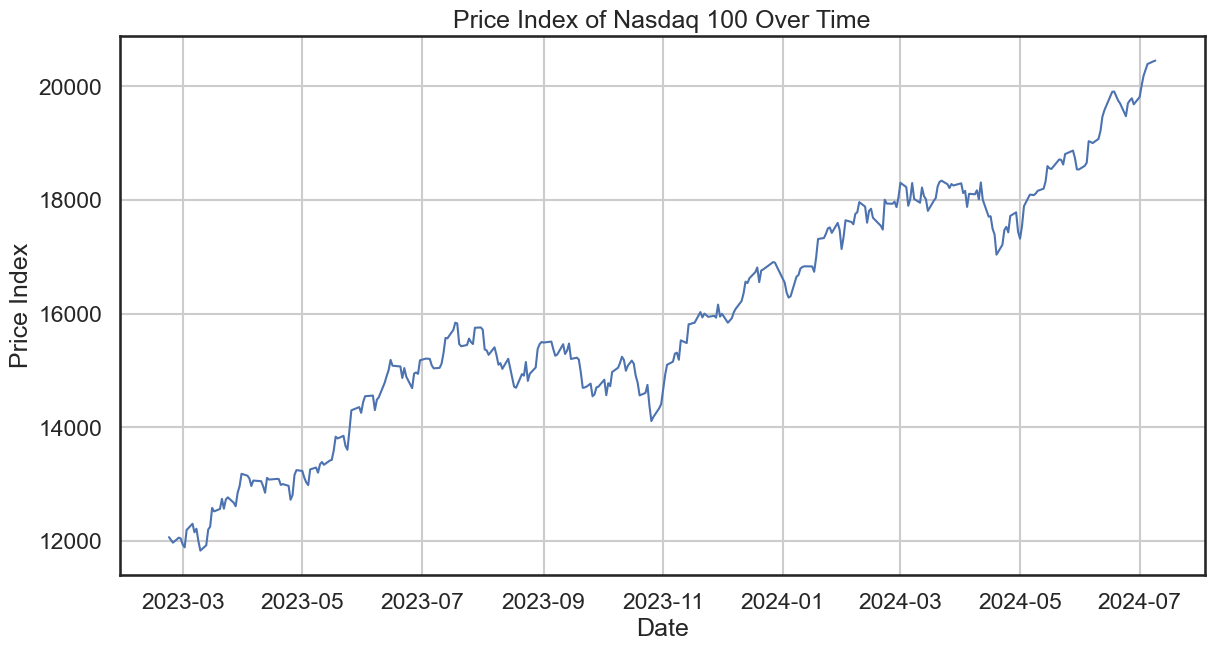

In [97]:
# Fetch data for the price index of the Nasdaq 100
if conn:
    try:
        query = "SELECT Date, PriceIndex FROM vwNDXPriceIndex"
        df_price_index = pd.read_sql(query, conn)
        print("Price index data fetched successfully.")
        
        # Convert Date to datetime
        df_price_index['Date'] = pd.to_datetime(df_price_index['Date'])
        
        # Plot the price index as a line chart
        plt.figure(figsize=(14, 7))
        sns.lineplot(x='Date', y='PriceIndex', data=df_price_index, color='b', linewidth=1.5)
        
        plt.title('Price Index of Nasdaq 100 Over Time')
        plt.xlabel('Date')
        plt.ylabel('Price Index')
        
        plt.grid(True)
        plt.show()
        
    except Exception as e:
        print(f"Error fetching or processing price index data: {e}")
else:
    print("Connection to SQL Server failed. Cannot fetch price index data.")

### 3.2 Volatility of Nasdaq 100 Over Time

Volatility measures the degree of variation of a financial instrument's trading price over time. Higher volatility means higher risk and potentially higher returns. The following chart illustrates the volatility of the Nasdaq 100 index over the specified period.


1. Initial Volatility Spike:
- Observation: There is a notable spike in volatility at the beginning of the period around March 2023.
- Potential Causes: This could be due to a specific market event, a reaction to a major economic report, or geopolitical events. The spike may also be influenced by the calculation method at the start of the data series where fewer data points are available.

1. Periods of Higher Volatility:
- Observation: There are several peaks in volatility throughout the period, particularly around May 2023, August 2023, November 2023, and January 2024.
- Potential Causes: These peaks likely correspond to significant market events such as quarterly earnings reports, changes in monetary policy, economic data releases, or other global events impacting investor sentiment.

1. Decreasing Volatility Trend:
- Observation: Overall, the volatility seems to trend downward slightly from early 2024 to mid-2024.
- Potential Causes: This could indicate a period of market stabilization or increased investor confidence, leading to less dramatic price swings.

1. Seasonal Patterns:
- Observation: Volatility shows some recurring patterns, with increases around specific times of the year.
- Potential Causes: This may be due to seasonal market behavior where certain months traditionally see higher trading activity and volatility, such as around fiscal year-ends, tax deadlines, or holiday seasons.

1. Longer Periods of Low Volatility:
- Observation: There are stretches of relatively low volatility, notably around mid-2023 and mid-2024.
- Potential Causes: These periods could indicate phases of market consolidation where prices move within a narrow range, possibly due to a lack of major market-moving news.

1. Sharp Declines in Volatility:
- Observation: There are instances of sharp declines in volatility, such as in late 2023.
- Potential Causes: These drops might be due to resolution of uncertainties, such as post-election periods, conclusion of major geopolitical events, or the release of market-moving economic data that brings clarity to investors.

Conclusion:
- Market Sentiment: The varying levels of volatility indicate shifts in market sentiment, driven by a combination of economic data, corporate earnings, geopolitical events, and investor behavior.
- Investment Strategy: For investors, understanding these volatility trends is crucial for risk management and making informed decisions. Higher volatility periods may warrant a more cautious approach, while lower volatility periods might present more stable investment opportunities.
- Predictive Insights: By analyzing past volatility patterns, investors and analysts can attempt to predict future market behavior and prepare for potential market shifts.

Volatility data fetched successfully.


C:\Users\Imprint\AppData\Local\Temp\ipykernel_1460\73676514.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_volatility_ndx = pd.read_sql(query, conn)


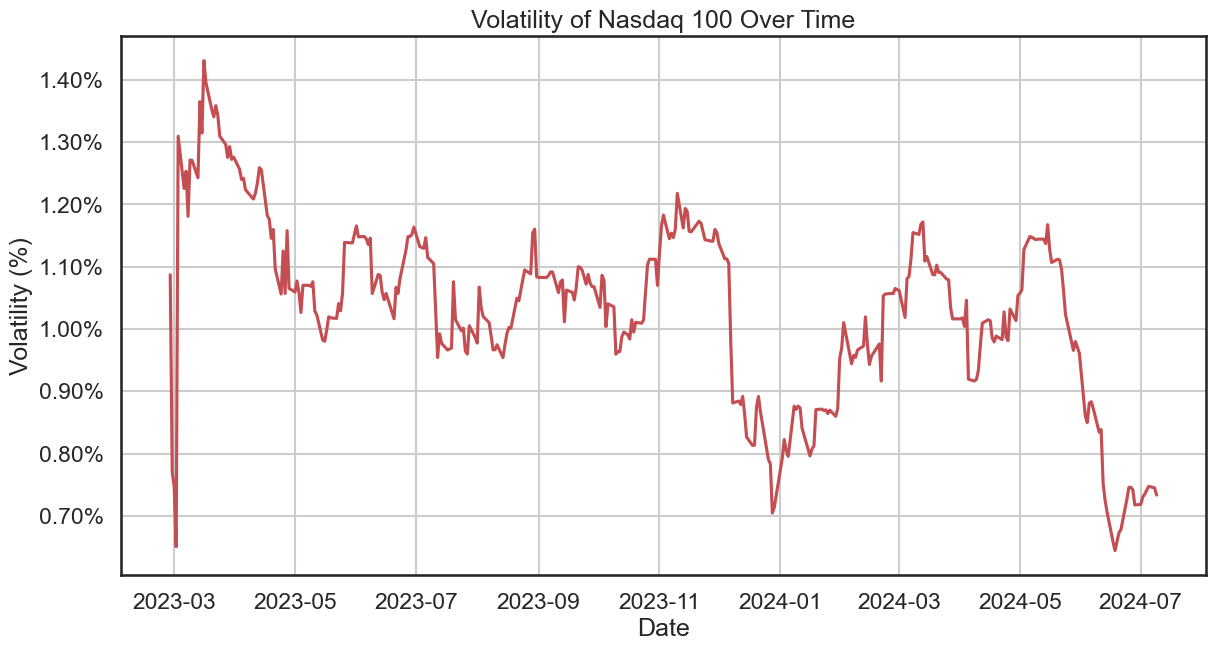

In [98]:
# Fetch data for volatility of Nasdaq 100
if conn:
    try:
        query = "SELECT * FROM vwNDXVolatility"
        df_volatility_ndx = pd.read_sql(query, conn)
        print("Volatility data fetched successfully.")
        
        # Convert Date to datetime
        df_volatility_ndx['Date'] = pd.to_datetime(df_volatility_ndx['Date'])
        
        # Plot volatility as a line chart
        plt.figure(figsize=(14, 7))
        sns.lineplot(x='Date', y='Volatility', data=df_volatility_ndx, color='r')
        
        plt.title('Volatility of Nasdaq 100 Over Time')
        plt.xlabel('Date')
        plt.ylabel('Volatility (%)')
        
        # Format y-axis as percentage
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.2%}'.format(y)))
        
        plt.grid(True)
        plt.show()
        
    except Exception as e:
        print(f"Error fetching or processing volatility data: {e}")
else:
    print("Connection to SQL Server failed. Cannot fetch volatility data.")


### 3.3 Cumulative Return of AAPL Compared to NDX Over Time

1. Performance Comparison:
- Initially, AAPL's performance closely mirrors that of the NDX, with both showing similar trends.
- Around the middle of the period, AAPL starts to underperform compared to the NDX.
- Towards the end of the period, both AAPL and the NDX show significant gains, but the NDX outperforms AAPL.

2. Volatility:
- AAPL exhibits higher volatility compared to the NDX, as seen from the more frequent ups and downs in its cumulative return line.
- This higher volatility can be attributed to the individual stock's response to market conditions, news, and company-specific events.

3. Overall Growth:
- Both AAPL and the NDX show substantial growth over the period, with the NDX achieving nearly 70% cumulative return and AAPL around 50% by the end.
4. Investment Insight:
- Investors looking for more stable growth might prefer the NDX, while those willing to endure more volatility for potentially higher returns might consider AAPL.

C:\Users\Imprint\AppData\Local\Temp\ipykernel_1460\195693819.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_aapl_ndx_comparison = pd.read_sql(query, conn)


AAPL and NDX comparison data fetched successfully.


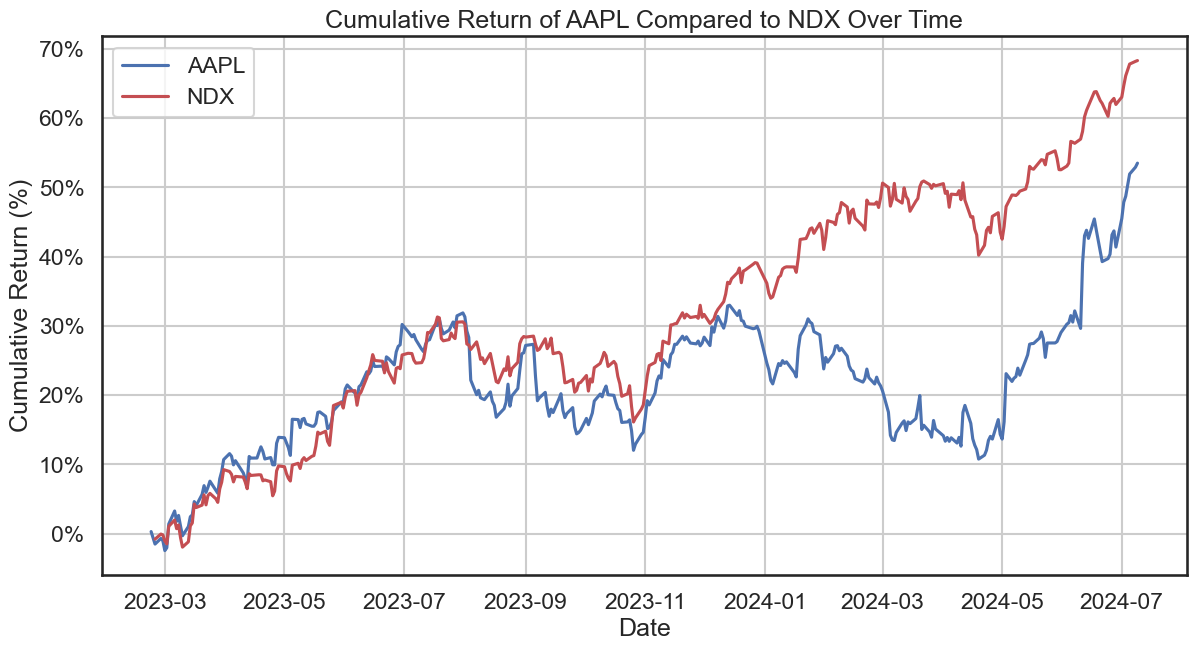

In [101]:
# Fetch data for AAPL and NDX comparison
if conn:
    try:
        query = "SELECT * FROM vwAAPL_NDXComparison"
        df_aapl_ndx_comparison = pd.read_sql(query, conn)
        print("AAPL and NDX comparison data fetched successfully.")
        
        # Convert Date to datetime
        df_aapl_ndx_comparison['Date'] = pd.to_datetime(df_aapl_ndx_comparison['Date'])
        
        # Calculate cumulative returns
        df_aapl_ndx_comparison['AAPLCumulativeReturn'] = (1 + df_aapl_ndx_comparison['AAPLReturn']).cumprod() - 1
        df_aapl_ndx_comparison['NDXCumulativeReturn'] = (1 + df_aapl_ndx_comparison['NDXReturn']).cumprod() - 1
        
        # Plot cumulative returns as a line chart
        plt.figure(figsize=(14, 7))
        sns.lineplot(x='Date', y='AAPLCumulativeReturn', data=df_aapl_ndx_comparison, label='AAPL', color='b')
        sns.lineplot(x='Date', y='NDXCumulativeReturn', data=df_aapl_ndx_comparison, label='NDX', color='r')
        
        plt.title('Cumulative Return of AAPL Compared to NDX Over Time')
        plt.xlabel('Date')
        plt.ylabel('Cumulative Return (%)')
        
        # Format y-axis as percentage
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
        
        plt.legend()
        plt.grid(True)
        plt.show()
        
    except Exception as e:
        print(f"Error fetching or processing AAPL and NDX comparison data: {e}")
else:
    print("Connection to SQL Server failed. Cannot fetch AAPL and NDX comparison data.")


### 4.1 Total Return for Forex Pairs

Analysis of EURUSD:
1. Volatility: The EURUSD pair exhibits moderate volatility over time, with returns generally fluctuating between -0.50% and 0.50%. The smoothing highlights that there are no extreme outliers or spikes in returns, suggesting a relatively stable trading pattern.

2. Mean Reversion: The returns seem to oscillate around the 0% mark, indicating a tendency towards mean reversion. This means that the EURUSD returns often revert back to an average value after deviating from it.

3. Period of Stability: There are periods where the returns appear more clustered around the 0% mark, suggesting lower volatility phases. These periods can be seen in mid-2023 and early 2024.

Analysis of USDJPY:
1. Higher Volatility: The USDJPY pair shows relatively higher volatility compared to the EURUSD pair, with more pronounced swings in returns. The fluctuations also generally stay within the range of -0.50% to 0.50%, but with more frequent and larger deviations.

2. Persistent Volatility: Unlike EURUSD, the USDJPY pair displays persistent volatility without significant periods of stability. The returns are consistently dispersed, indicating a more dynamic trading environment.

3. Risk Management: Given the higher volatility in USDJPY, traders might need to adopt more robust risk management strategies when trading this pair, compared to EURUSD.

Comparison Between EURUSD and USDJPY:
1. Risk Profile: EURUSD appears to be a less risky asset compared to USDJPY due to its lower and more stable volatility. Traders looking for safer investments might prefer EURUSD.

2. Trading Opportunities: The higher volatility in USDJPY could present more trading opportunities for those who can manage the associated risks. Short-term traders might find the frequent swings in USDJPY returns more appealing.

C:\Users\Imprint\AppData\Local\Temp\ipykernel_1460\3847908669.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_forex_total_return = pd.read_sql(query, conn)


Total return data for Forex pairs fetched successfully.


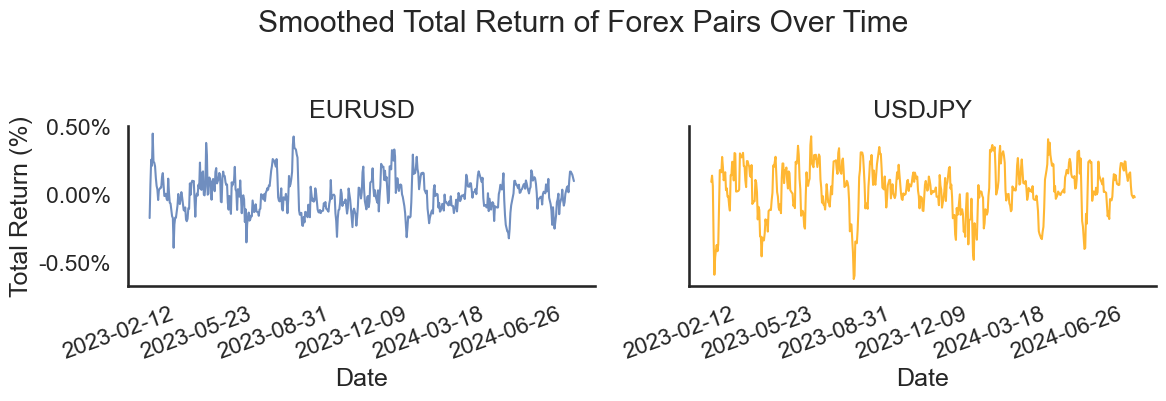

In [107]:
# Define a color palette for the Forex pairs
palette = {
    'EURUSD': 'b',    # Blue
    'USDJPY': 'orange'  # Orange
}

# Fetch data for total return of Forex pairs
if conn:
    try:
        query = "SELECT * FROM vwForexReturns"
        df_forex_total_return = pd.read_sql(query, conn)
        print("Total return data for Forex pairs fetched successfully.")
        
        # Convert Date to datetime
        df_forex_total_return['Date'] = pd.to_datetime(df_forex_total_return['Date'])
        
        # Apply a 7-day rolling average to smooth the data
        df_forex_total_return['SmoothedReturn'] = df_forex_total_return.groupby('Ticker')['Return'].transform(lambda x: x.rolling(7).mean())
        
        # Create a FacetGrid for each Forex pair
        g = sns.FacetGrid(df_forex_total_return, col='Ticker', col_wrap=2, height=4, aspect=1.5, palette=palette)
        g.map_dataframe(sns.lineplot, 'Date', 'SmoothedReturn', hue='Ticker', alpha=0.8, linewidth=1.5, palette=palette)
        
        # Add titles and format y-axis as percentage
        g.set_titles("{col_name}")
        g.set_axis_labels("Date", "Total Return (%)")
        
        # Rotate date labels and set date format
        for ax in g.axes.flatten():
            ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.2%}'.format(y)))
            ax.xaxis.set_major_locator(plt.MaxNLocator(7))  # Set a max of 7 date labels
            for label in ax.get_xticklabels():
                label.set_rotation(20)
                label.set_horizontalalignment('right')
        
        plt.suptitle('Smoothed Total Return of Forex Pairs Over Time', y=1.02)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error fetching or processing total return data for Forex pairs: {e}")
else:
    print("Connection to SQL Server failed. Cannot fetch total return data for Forex pairs.")


### 4.2 Cumulative Return of Forex Pairs


1. Performance Over Time:
- USDJPY: The cumulative return of USDJPY has shown a significant upward trend, peaking at over 20%. This indicates that holding USDJPY over the observed period would have resulted in substantial gains.
- EURUSD: In contrast, the cumulative return of EURUSD has been relatively flat, hovering around 0%. This suggests that holding EURUSD over the same period would not have yielded significant gains.

2. Volatility:
- Both forex pairs show periods of fluctuation, but USDJPY appears to have more pronounced upward movements compared to EURUSD. 
This could indicate higher volatility for USDJPY, which might be appealing to traders looking for larger potential returns but comes with increased risk.

3. Comparison to Each Other:
- USDJPY has consistently outperformed EURUSD in terms of cumulative return. Traders and investors might prefer USDJPY over EURUSD based on historical performance, assuming they can manage the associated risks.

C:\Users\Imprint\AppData\Local\Temp\ipykernel_1460\3245612301.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_forex_cumulative_return = pd.read_sql(query, conn)


Cumulative return data for Forex pairs fetched successfully.


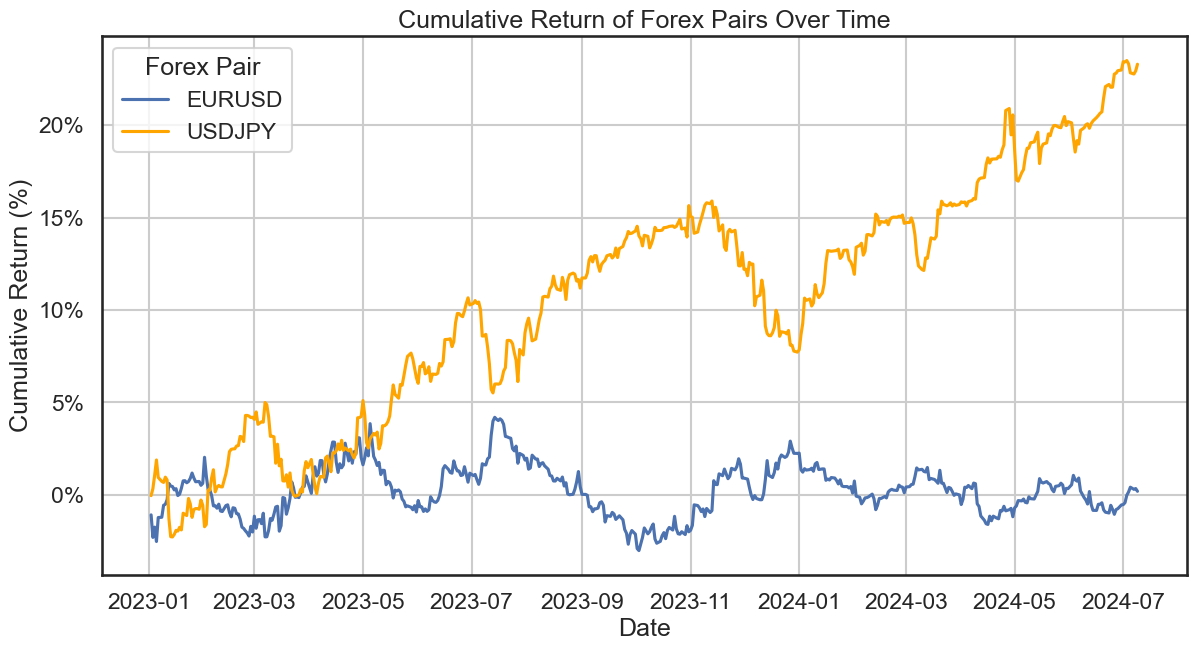

In [113]:
# Fetch data for cumulative return of Forex pairs
if conn:
    try:
        query = "SELECT * FROM vwForexCumulativeReturns"
        df_forex_cumulative_return = pd.read_sql(query, conn)
        print("Cumulative return data for Forex pairs fetched successfully.")
        
        # Convert Date to datetime
        df_forex_cumulative_return['Date'] = pd.to_datetime(df_forex_cumulative_return['Date'])
        
        # Set the colors for the specific Forex pairs
        palette = {
            'EURUSD': 'b',
            'USDJPY': 'orange'
        }
        
        # Plot cumulative returns as a line chart for each Forex pair on the same graph
        plt.figure(figsize=(14, 7))
        sns.lineplot(x='Date', y='CumulativeReturn', hue='Ticker', data=df_forex_cumulative_return, palette=palette)
        
        plt.title('Cumulative Return of Forex Pairs Over Time')
        plt.xlabel('Date')
        plt.ylabel('Cumulative Return (%)')
        
        # Format y-axis as percentage
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
        
        plt.legend(title='Forex Pair')
        plt.grid(True)
        plt.show()
        
    except Exception as e:
        print(f"Error fetching or processing cumulative return data for Forex pairs: {e}")
else:
    print("Connection to SQL Server failed. Cannot fetch cumulative return data for Forex pairs.")


### 4.3 Percentage Change of Forex Pairs


The boxplot for the percentage change of the Forex pairs EURUSD and USDJPY provides several insights:

1. **Median and Interquartile Range (IQR):**
   - The median (the line within each box) for both EURUSD and USDJPY is close to 0%, indicating that over the period, the central tendency of the percentage changes for both pairs hovers around no significant change.
   - The IQR (the height of each box) shows the middle 50% of the data points. The IQR for EURUSD appears to be narrower than for USDJPY, suggesting less variability in the percentage changes for EURUSD compared to USDJPY.

2. **Outliers:**
   - There are numerous outliers for both EURUSD and USDJPY, as indicated by the dots outside the whiskers. This signifies that there were several days with percentage changes significantly higher or lower than the typical range.
   - The EURUSD pair has more extreme outliers compared to USDJPY, suggesting occasional high volatility in the EURUSD pair.

3. **Whiskers:**
   - The whiskers extend to the most extreme data points within 1.5 times the IQR from the quartiles. The whiskers for both pairs are quite extensive, indicating that there is substantial variability in the percentage changes beyond the IQR.

4. **Comparison Between Pairs:**
   - Comparing the two Forex pairs, USDJPY shows a broader IQR, indicating more variability in daily percentage changes.
   - The presence of outliers in both pairs suggests that traders need to be cautious and consider these potential significant fluctuations when making trading decisions.

Overall, the boxplot reveals that both Forex pairs experienced substantial variability in their daily percentage changes, with USDJPY showing a slightly higher range of changes. The analysis highlights the importance of managing risk and volatility when trading these Forex pairs.


Percentage change data for Forex pairs fetched successfully.


C:\Users\Imprint\AppData\Local\Temp\ipykernel_1460\1817054084.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_forex_percentage_change = pd.read_sql(query, conn)
C:\Users\Imprint\AppData\Local\Temp\ipykernel_1460\1817054084.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ticker', y='PercentageChange', data=df_forex_percentage_change, palette=palette)


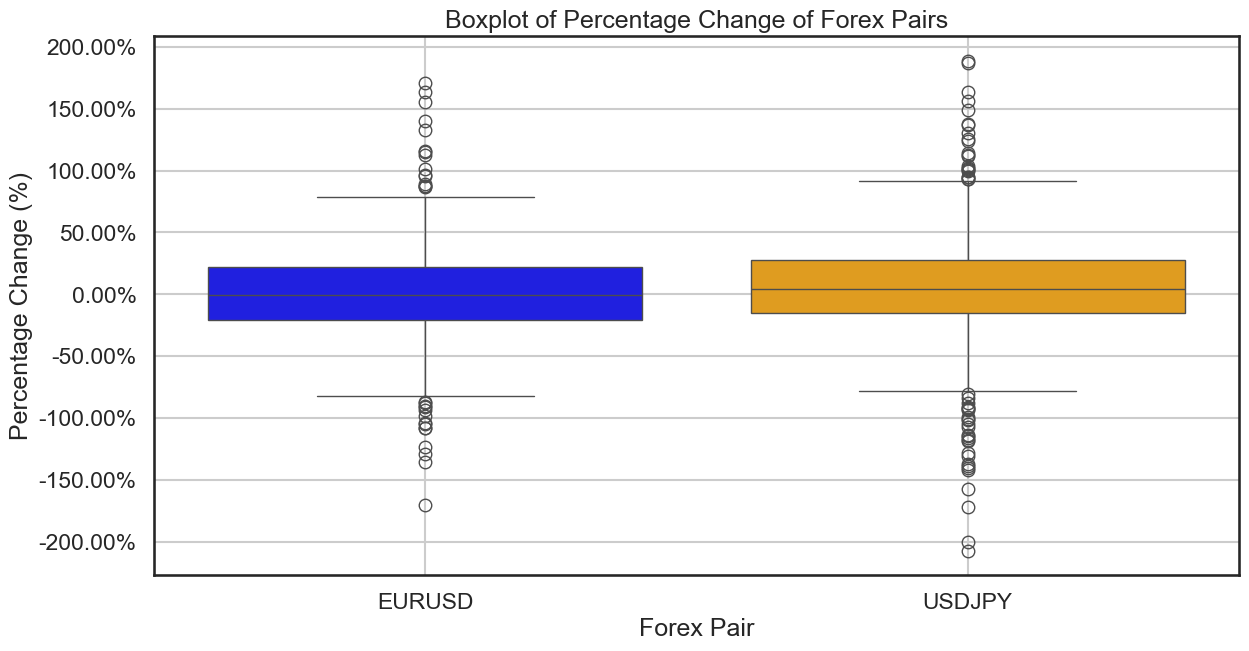

In [115]:
# Fetch data for percentage change of Forex pairs
if conn:
    try:
        query = "SELECT * FROM vwForexPercentageChange"
        df_forex_percentage_change = pd.read_sql(query, conn)
        print("Percentage change data for Forex pairs fetched successfully.")
        
        # Convert Date to datetime
        df_forex_percentage_change['Date'] = pd.to_datetime(df_forex_percentage_change['Date'])
        
        # Set the colors for the specific Forex pairs
        palette = {
            'EURUSD': 'blue',
            'USDJPY': 'orange'
        }
        
        # Plot percentage changes as a boxplot for each Forex pair
        plt.figure(figsize=(14, 7))
        sns.boxplot(x='Ticker', y='PercentageChange', data=df_forex_percentage_change, palette=palette)
        
        plt.title('Boxplot of Percentage Change of Forex Pairs')
        plt.xlabel('Forex Pair')
        plt.ylabel('Percentage Change (%)')
        
        # Format y-axis as percentage
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.2%}'.format(y)))
        
        plt.grid(True)
        plt.show()
        
    except Exception as e:
        print(f"Error fetching or processing percentage change data for Forex pairs: {e}")
else:
    print("Connection to SQL Server failed. Cannot fetch percentage change data for Forex pairs.")
